In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

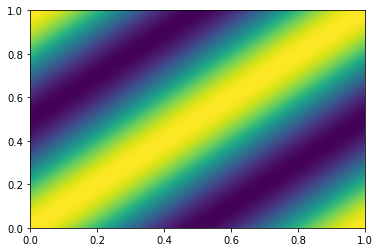

In [13]:
plt.contourf(xmesh, ymesh, out1[0,:,:], levels=128)

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(sensor1, out1, test_size=0.18, random_state=42)

In [15]:
x_test1.shape

(8, 16, 1)

In [16]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [17]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [18]:
np.savetxt('x_AF1.csv', sensor1.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF1.csv', out1.reshape((41*101, 101)), delimiter=",")

In [19]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=169, activation='relu', name='outLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
reshape = tf.keras.layers.Reshape((13, 13, 1))(x_)

x_ = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          name='firstConv2DDecoder')(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.UpSampling2D((2, 2))(x_)
x_ = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          name='secondConv2DDecoder')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.UpSampling2D((2, 2))(x_)
x_ = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          name='thirdConv2DDecoder')(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.UpSampling2D((2, 2))(x_)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same')(x_)
reshape2 = tf.keras.layers.Reshape((100*100*1, ))(decoded)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(reshape2)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_data, output_img)
sd2 = tf.keras.Model(input_data, output_img)
sd3 = tf.keras.Model(input_data, output_img)

In [20]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 16)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2176      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [21]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [22]:
start1 = datetime.datetime.now()
history1 = sd1.fit(x_train1, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 5s 217ms/step - loss: 2.9323 - rmse: 1.4984
Epoch 2/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.4634 - rmse: 0.8813
Epoch 3/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.1227 - rmse: 0.6607
Epoch 4/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.0173 - rmse: 0.5759
Epoch 5/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.9266 - rmse: 0.4914
Epoch 6/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.8634 - rmse: 0.4228
Epoch 7/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.8274 - rmse: 0.3786
Epoch 8/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.7993 - rmse: 0.3404
Epoch 9/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.7824 - rmse: 0.3154
Epoch 10/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.7729 - rmse: 0.3011
Epoch 11/10000
2/2 [==================

2/2 [==============================] - 0s 34ms/step - loss: 0.5734 - rmse: 0.0531
Epoch 169/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.5725 - rmse: 0.0513
Epoch 170/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.5715 - rmse: 0.0483
Epoch 171/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.5712 - rmse: 0.0529
Epoch 172/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.5733 - rmse: 0.0748
Epoch 173/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.5705 - rmse: 0.0588
Epoch 174/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.5695 - rmse: 0.0563
Epoch 175/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.5691 - rmse: 0.0590
Epoch 176/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.5679 - rmse: 0.0542
Epoch 177/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.5679 - rmse: 0.0603
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 29ms/step - loss: 0.4650 - rmse: 0.0452
Epoch 335/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.4657 - rmse: 0.0582
Epoch 336/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.4633 - rmse: 0.0400
Epoch 337/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.4628 - rmse: 0.0401
Epoch 338/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.4632 - rmse: 0.0513
Epoch 339/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.4656 - rmse: 0.0753
Epoch 340/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.4630 - rmse: 0.0604
Epoch 341/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.4626 - rmse: 0.0619
Epoch 342/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.4608 - rmse: 0.0507
Epoch 343/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.4604 - rmse: 0.0527
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 28ms/step - loss: 0.3814 - rmse: 0.0539
Epoch 501/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3809 - rmse: 0.0532
Epoch 502/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3811 - rmse: 0.0591
Epoch 503/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3792 - rmse: 0.0445
Epoch 504/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3787 - rmse: 0.0435
Epoch 505/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.3779 - rmse: 0.0390
Epoch 506/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3799 - rmse: 0.0624
Epoch 507/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3769 - rmse: 0.0363
Epoch 508/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3767 - rmse: 0.0387
Epoch 509/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3777 - rmse: 0.0543
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 28ms/step - loss: 0.3160 - rmse: 0.0374
Epoch 667/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3169 - rmse: 0.0520
Epoch 668/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3162 - rmse: 0.0477
Epoch 669/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3147 - rmse: 0.0342
Epoch 670/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3145 - rmse: 0.0361
Epoch 671/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3144 - rmse: 0.0394
Epoch 672/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3136 - rmse: 0.0334
Epoch 673/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3131 - rmse: 0.0320
Epoch 674/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.3167 - rmse: 0.0703
Epoch 675/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.3138 - rmse: 0.0487
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 31ms/step - loss: 0.2630 - rmse: 0.0388
Epoch 833/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.2620 - rmse: 0.0269
Epoch 834/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.2615 - rmse: 0.0247
Epoch 835/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.2612 - rmse: 0.0239
Epoch 836/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.2614 - rmse: 0.0327
Epoch 837/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.2635 - rmse: 0.0586
Epoch 838/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.2616 - rmse: 0.0431
Epoch 839/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.2607 - rmse: 0.0355
Epoch 840/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.2602 - rmse: 0.0321
Epoch 841/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.2606 - rmse: 0.0410
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 28ms/step - loss: 0.2181 - rmse: 0.0232
Epoch 999/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2180 - rmse: 0.0247
Epoch 1000/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2218 - rmse: 0.0682
Epoch 1001/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2175 - rmse: 0.0247
Epoch 1002/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.2184 - rmse: 0.0420
Epoch 1003/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2184 - rmse: 0.0452
Epoch 1004/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2177 - rmse: 0.0391
Epoch 1005/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2168 - rmse: 0.0298
Epoch 1006/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.2169 - rmse: 0.0351
Epoch 1007/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.2175 - rmse: 0.0452
Epoch 1008/10000
2/2 [======

2/2 [==============================] - 0s 30ms/step - loss: 0.1854 - rmse: 0.0421
Epoch 1163/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1845 - rmse: 0.0321
Epoch 1164/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1841 - rmse: 0.0293
Epoch 1165/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1838 - rmse: 0.0270
Epoch 1166/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1837 - rmse: 0.0277
Epoch 1167/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1879 - rmse: 0.0719
Epoch 1168/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1833 - rmse: 0.0270
Epoch 1169/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1842 - rmse: 0.0433
Epoch 1170/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1831 - rmse: 0.0299
Epoch 1171/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1831 - rmse: 0.0341
Epoch 1172/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.1572 - rmse: 0.0249
Epoch 1327/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1574 - rmse: 0.0313
Epoch 1328/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1567 - rmse: 0.0206
Epoch 1329/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1567 - rmse: 0.0240
Epoch 1330/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1578 - rmse: 0.0426
Epoch 1331/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1562 - rmse: 0.0184
Epoch 1332/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1562 - rmse: 0.0235
Epoch 1333/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1561 - rmse: 0.0240
Epoch 1334/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1582 - rmse: 0.0530
Epoch 1335/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1558 - rmse: 0.0240
Epoch 1336/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.1335 - rmse: 0.0305
Epoch 1491/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1367 - rmse: 0.0649
Epoch 1492/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1331 - rmse: 0.0278
Epoch 1493/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1330 - rmse: 0.0277
Epoch 1494/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1327 - rmse: 0.0243
Epoch 1495/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1327 - rmse: 0.0279
Epoch 1496/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1325 - rmse: 0.0262
Epoch 1497/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1326 - rmse: 0.0302
Epoch 1498/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1344 - rmse: 0.0534
Epoch 1499/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1342 - rmse: 0.0535
Epoch 1500/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.1239 - rmse: 0.0437
Epoch 1655/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1247 - rmse: 0.0518
Epoch 1656/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1233 - rmse: 0.0359
Epoch 1657/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1233 - rmse: 0.0364
Epoch 1658/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1247 - rmse: 0.0531
Epoch 1659/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1232 - rmse: 0.0367
Epoch 1660/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1229 - rmse: 0.0324
Epoch 1661/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1227 - rmse: 0.0297
Epoch 1662/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1229 - rmse: 0.0333
Epoch 1663/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1239 - rmse: 0.0462
Epoch 1664/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.1191 - rmse: 0.0333
Epoch 1819/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1192 - rmse: 0.0343
Epoch 1820/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1199 - rmse: 0.0436
Epoch 1821/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1195 - rmse: 0.0392
Epoch 1822/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1199 - rmse: 0.0441
Epoch 1823/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1190 - rmse: 0.0326
Epoch 1824/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1182 - rmse: 0.0191
Epoch 1825/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1182 - rmse: 0.0189
Epoch 1826/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1183 - rmse: 0.0214
Epoch 1827/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1182 - rmse: 0.0197
Epoch 1828/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.1139 - rmse: 0.0164
Epoch 1983/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1140 - rmse: 0.0203
Epoch 1984/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1147 - rmse: 0.0334
Epoch 1985/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1143 - rmse: 0.0274
Epoch 1986/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1150 - rmse: 0.0384
Epoch 1987/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1140 - rmse: 0.0226
Epoch 1988/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1139 - rmse: 0.0203
Epoch 1989/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1139 - rmse: 0.0215
Epoch 1990/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1143 - rmse: 0.0296
Epoch 1991/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1140 - rmse: 0.0245
Epoch 1992/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.1093 - rmse: 0.0204
Epoch 2147/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1094 - rmse: 0.0248
Epoch 2148/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1092 - rmse: 0.0209
Epoch 2149/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1092 - rmse: 0.0211
Epoch 2150/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1091 - rmse: 0.0196
Epoch 2151/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1089 - rmse: 0.0136
Epoch 2152/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1088 - rmse: 0.0123
Epoch 2153/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1088 - rmse: 0.0134
Epoch 2154/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1097 - rmse: 0.0325
Epoch 2155/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.1090 - rmse: 0.0196
Epoch 2156/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.1039 - rmse: 0.0168
Epoch 2311/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1041 - rmse: 0.0217
Epoch 2312/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1064 - rmse: 0.0533
Epoch 2313/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1038 - rmse: 0.0173
Epoch 2314/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1038 - rmse: 0.0170
Epoch 2315/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1038 - rmse: 0.0181
Epoch 2316/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1044 - rmse: 0.0303
Epoch 2317/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1038 - rmse: 0.0206
Epoch 2318/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1041 - rmse: 0.0264
Epoch 2319/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1038 - rmse: 0.0220
Epoch 2320/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0984 - rmse: 0.0197
Epoch 2475/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1000 - rmse: 0.0456
Epoch 2476/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0983 - rmse: 0.0181
Epoch 2477/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0981 - rmse: 0.0124
Epoch 2478/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0981 - rmse: 0.0148
Epoch 2479/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0982 - rmse: 0.0181
Epoch 2480/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.1007 - rmse: 0.0538
Epoch 2481/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0981 - rmse: 0.0188
Epoch 2482/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0980 - rmse: 0.0162
Epoch 2483/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0991 - rmse: 0.0376
Epoch 2484/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0925 - rmse: 0.0225
Epoch 2639/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0922 - rmse: 0.0155
Epoch 2640/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0923 - rmse: 0.0189
Epoch 2641/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0930 - rmse: 0.0326
Epoch 2642/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0926 - rmse: 0.0265
Epoch 2643/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0921 - rmse: 0.0149
Epoch 2644/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0928 - rmse: 0.0315
Epoch 2645/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0925 - rmse: 0.0277
Epoch 2646/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0944 - rmse: 0.0519
Epoch 2647/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0920 - rmse: 0.0190
Epoch 2648/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0865 - rmse: 0.0283
Epoch 2803/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0862 - rmse: 0.0232
Epoch 2804/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0864 - rmse: 0.0281
Epoch 2805/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0862 - rmse: 0.0248
Epoch 2806/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0881 - rmse: 0.0512
Epoch 2807/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0857 - rmse: 0.0164
Epoch 2808/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0874 - rmse: 0.0437
Epoch 2809/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0861 - rmse: 0.0263
Epoch 2810/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0857 - rmse: 0.0185
Epoch 2811/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0869 - rmse: 0.0395
Epoch 2812/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0798 - rmse: 0.0253
Epoch 2967/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0794 - rmse: 0.0179
Epoch 2968/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0810 - rmse: 0.0440
Epoch 2969/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0813 - rmse: 0.0483
Epoch 2970/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0792 - rmse: 0.0156
Epoch 2971/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0796 - rmse: 0.0257
Epoch 2972/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0793 - rmse: 0.0201
Epoch 2973/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0790 - rmse: 0.0139
Epoch 2974/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0797 - rmse: 0.0295
Epoch 2975/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0794 - rmse: 0.0251
Epoch 2976/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0736 - rmse: 0.0340
Epoch 3131/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0728 - rmse: 0.0194
Epoch 3132/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0730 - rmse: 0.0249
Epoch 3133/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0736 - rmse: 0.0360
Epoch 3134/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0724 - rmse: 0.0129
Epoch 3135/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0734 - rmse: 0.0342
Epoch 3136/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0729 - rmse: 0.0263
Epoch 3137/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0737 - rmse: 0.0399
Epoch 3138/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0725 - rmse: 0.0191
Epoch 3139/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0723 - rmse: 0.0152
Epoch 3140/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0664 - rmse: 0.0247
Epoch 3295/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0662 - rmse: 0.0228
Epoch 3296/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0673 - rmse: 0.0403
Epoch 3297/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0667 - rmse: 0.0333
Epoch 3298/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0664 - rmse: 0.0288
Epoch 3299/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0663 - rmse: 0.0266
Epoch 3300/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0658 - rmse: 0.0173
Epoch 3301/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0657 - rmse: 0.0148
Epoch 3302/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0681 - rmse: 0.0517
Epoch 3303/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0669 - rmse: 0.0394
Epoch 3304/10000
2/2 [=====

2/2 [==============================] - 0s 33ms/step - loss: 0.0600 - rmse: 0.0296
Epoch 3459/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0593 - rmse: 0.0149
Epoch 3460/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0592 - rmse: 0.0148
Epoch 3461/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0593 - rmse: 0.0174
Epoch 3462/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0592 - rmse: 0.0160
Epoch 3463/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0591 - rmse: 0.0156
Epoch 3464/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0590 - rmse: 0.0129
Epoch 3465/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0591 - rmse: 0.0154
Epoch 3466/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0600 - rmse: 0.0349
Epoch 3467/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0589 - rmse: 0.0134
Epoch 3468/10000
2/2 [=====

2/2 [==============================] - 0s 34ms/step - loss: 0.0534 - rmse: 0.0296
Epoch 3623/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0529 - rmse: 0.0186
Epoch 3624/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0538 - rmse: 0.0360
Epoch 3625/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0535 - rmse: 0.0332
Epoch 3626/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0531 - rmse: 0.0270
Epoch 3627/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0540 - rmse: 0.0408
Epoch 3628/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0528 - rmse: 0.0209
Epoch 3629/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0529 - rmse: 0.0248
Epoch 3630/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0526 - rmse: 0.0195
Epoch 3631/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0524 - rmse: 0.0156
Epoch 3632/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0463 - rmse: 0.0132
Epoch 3787/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0466 - rmse: 0.0224
Epoch 3788/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0465 - rmse: 0.0193
Epoch 3789/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0464 - rmse: 0.0181
Epoch 3790/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0473 - rmse: 0.0356
Epoch 3791/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0472 - rmse: 0.0347
Epoch 3792/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0466 - rmse: 0.0254
Epoch 3793/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0465 - rmse: 0.0248
Epoch 3794/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0463 - rmse: 0.0204
Epoch 3795/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0465 - rmse: 0.0269
Epoch 3796/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0402 - rmse: 0.0141
Epoch 3951/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0404 - rmse: 0.0201
Epoch 3952/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0404 - rmse: 0.0216
Epoch 3953/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0416 - rmse: 0.0411
Epoch 3954/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0405 - rmse: 0.0255
Epoch 3955/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0407 - rmse: 0.0292
Epoch 3956/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0402 - rmse: 0.0197
Epoch 3957/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0408 - rmse: 0.0325
Epoch 3958/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0404 - rmse: 0.0262
Epoch 3959/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0419 - rmse: 0.0471
Epoch 3960/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0352 - rmse: 0.0310
Epoch 4115/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0348 - rmse: 0.0252
Epoch 4116/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0353 - rmse: 0.0344
Epoch 4117/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0354 - rmse: 0.0366
Epoch 4118/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0345 - rmse: 0.0202
Epoch 4119/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0346 - rmse: 0.0248
Epoch 4120/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0346 - rmse: 0.0246
Epoch 4121/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0343 - rmse: 0.0190
Epoch 4122/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0343 - rmse: 0.0188
Epoch 4123/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0341 - rmse: 0.0155
Epoch 4124/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0295 - rmse: 0.0215
Epoch 4279/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0295 - rmse: 0.0210
Epoch 4280/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0297 - rmse: 0.0264
Epoch 4281/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0294 - rmse: 0.0218
Epoch 4282/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0328 - rmse: 0.0623
Epoch 4283/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0311 - rmse: 0.0469
Epoch 4284/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0300 - rmse: 0.0334
Epoch 4285/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0296 - rmse: 0.0278
Epoch 4286/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0300 - rmse: 0.0341
Epoch 4287/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0299 - rmse: 0.0334
Epoch 4288/10000
2/2 [=====

2/2 [==============================] - 0s 33ms/step - loss: 0.0255 - rmse: 0.0356
Epoch 4443/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0263 - rmse: 0.0465
Epoch 4444/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0248 - rmse: 0.0254
Epoch 4445/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0245 - rmse: 0.0186
Epoch 4446/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0248 - rmse: 0.0271
Epoch 4447/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0253 - rmse: 0.0351
Epoch 4448/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0252 - rmse: 0.0347
Epoch 4449/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0246 - rmse: 0.0247
Epoch 4450/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0245 - rmse: 0.0222
Epoch 4451/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0249 - rmse: 0.0313
Epoch 4452/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0259 - rmse: 0.0774
Epoch 4607/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0237 - rmse: 0.0622
Epoch 4608/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0222 - rmse: 0.0487
Epoch 4609/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0215 - rmse: 0.0412
Epoch 4610/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0214 - rmse: 0.0395
Epoch 4611/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0212 - rmse: 0.0377
Epoch 4612/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0207 - rmse: 0.0305
Epoch 4613/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0213 - rmse: 0.0395
Epoch 4614/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0217 - rmse: 0.0443
Epoch 4615/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0205 - rmse: 0.0285
Epoch 4616/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0177 - rmse: 0.0406
Epoch 4771/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0174 - rmse: 0.0364
Epoch 4772/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0168 - rmse: 0.0275
Epoch 4773/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0167 - rmse: 0.0258
Epoch 4774/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0170 - rmse: 0.0312
Epoch 4775/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0166 - rmse: 0.0252
Epoch 4776/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0171 - rmse: 0.0334
Epoch 4777/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0164 - rmse: 0.0211
Epoch 4778/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0164 - rmse: 0.0210
Epoch 4779/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0174 - rmse: 0.0380
Epoch 4780/10000
2/2 [=====

2/2 [==============================] - 0s 33ms/step - loss: 0.0134 - rmse: 0.0244
Epoch 4935/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0129 - rmse: 0.0117
Epoch 4936/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0141 - rmse: 0.0371
Epoch 4937/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0130 - rmse: 0.0155
Epoch 4938/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0130 - rmse: 0.0177
Epoch 4939/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0137 - rmse: 0.0314
Epoch 4940/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0135 - rmse: 0.0288
Epoch 4941/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0139 - rmse: 0.0362
Epoch 4942/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0140 - rmse: 0.0368
Epoch 4943/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0152 - rmse: 0.0507
Epoch 4944/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0106 - rmse: 0.0247
Epoch 5099/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0106 - rmse: 0.0261
Epoch 5100/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0104 - rmse: 0.0215
Epoch 5101/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0112 - rmse: 0.0358
Epoch 5102/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0101 - rmse: 0.0140
Epoch 5103/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0105 - rmse: 0.0250
Epoch 5104/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0129 - rmse: 0.0554
Epoch 5105/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0102 - rmse: 0.0198
Epoch 5106/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0101 - rmse: 0.0177
Epoch 5107/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0107 - rmse: 0.0303
Epoch 5108/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0088 - rmse: 0.0336
Epoch 5263/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0086 - rmse: 0.0315
Epoch 5264/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0080 - rmse: 0.0207
Epoch 5265/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0090 - rmse: 0.0379
Epoch 5266/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0079 - rmse: 0.0188
Epoch 5267/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0088 - rmse: 0.0351
Epoch 5268/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0087 - rmse: 0.0339
Epoch 5269/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0103 - rmse: 0.0525
Epoch 5270/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0086 - rmse: 0.0329
Epoch 5271/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0085 - rmse: 0.0309
Epoch 5272/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0581
Epoch 5427/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0071 - rmse: 0.0367
Epoch 5428/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0097 - rmse: 0.0624
Epoch 5429/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0066 - rmse: 0.0298
Epoch 5430/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0065 - rmse: 0.0275
Epoch 5431/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0375
Epoch 5432/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0230
Epoch 5433/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0065 - rmse: 0.0273
Epoch 5434/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - rmse: 0.0307
Epoch 5435/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0063 - rmse: 0.0251
Epoch 5436/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0205
Epoch 5591/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0052 - rmse: 0.0299
Epoch 5592/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0535
Epoch 5593/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0298
Epoch 5594/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0295
Epoch 5595/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0047 - rmse: 0.0209
Epoch 5596/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0171
Epoch 5597/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0392
Epoch 5598/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0211
Epoch 5599/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0244
Epoch 5600/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0113 - rmse: 0.0901
Epoch 5755/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0690 - rmse: 0.2567
Epoch 5756/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0216 - rmse: 0.1356
Epoch 5757/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0841 - rmse: 0.2844
Epoch 5758/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.6700 - rmse: 0.8165
Epoch 5759/10000
2/2 [==============================] - 0s 30ms/step - loss: 9.0835 - rmse: 3.0133
Epoch 5760/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.5302 - rmse: 0.7257
Epoch 5761/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.8745 - rmse: 1.9674
Epoch 5762/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.1088 - rmse: 0.3236
Epoch 5763/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.4903 - rmse: 0.6970
Epoch 5764/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0072 - rmse: 0.0276
Epoch 5919/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0200
Epoch 5920/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0075 - rmse: 0.0332
Epoch 5921/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0078 - rmse: 0.0370
Epoch 5922/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0251
Epoch 5923/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0239
Epoch 5924/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0072 - rmse: 0.0281
Epoch 5925/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0181
Epoch 5926/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0084 - rmse: 0.0453
Epoch 5927/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0087 - rmse: 0.0482
Epoch 5928/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0143
Epoch 6083/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0241
Epoch 6084/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0397
Epoch 6085/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0066 - rmse: 0.0235
Epoch 6086/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0064 - rmse: 0.0176
Epoch 6087/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0069 - rmse: 0.0288
Epoch 6088/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0066 - rmse: 0.0223
Epoch 6089/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0066 - rmse: 0.0228
Epoch 6090/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0063 - rmse: 0.0160
Epoch 6091/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0066 - rmse: 0.0222
Epoch 6092/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0064 - rmse: 0.0241
Epoch 6247/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0064 - rmse: 0.0252
Epoch 6248/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0217
Epoch 6249/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0389
Epoch 6250/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0063 - rmse: 0.0229
Epoch 6251/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0414
Epoch 6252/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0221
Epoch 6253/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0326
Epoch 6254/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0077 - rmse: 0.0439
Epoch 6255/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0135
Epoch 6256/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0355
Epoch 6411/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0069 - rmse: 0.0377
Epoch 6412/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0386
Epoch 6413/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0058 - rmse: 0.0160
Epoch 6414/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0162
Epoch 6415/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0139
Epoch 6416/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0195
Epoch 6417/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0059 - rmse: 0.0205
Epoch 6418/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0467
Epoch 6419/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0060 - rmse: 0.0230
Epoch 6420/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0431
Epoch 6575/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0057 - rmse: 0.0219
Epoch 6576/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0312
Epoch 6577/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0388
Epoch 6578/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0452
Epoch 6579/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0232
Epoch 6580/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0065 - rmse: 0.0365
Epoch 6581/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0175
Epoch 6582/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0059 - rmse: 0.0262
Epoch 6583/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - rmse: 0.0382
Epoch 6584/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0056 - rmse: 0.0255
Epoch 6739/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0206
Epoch 6740/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0190
Epoch 6741/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0463
Epoch 6742/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0313
Epoch 6743/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0189
Epoch 6744/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0054 - rmse: 0.0209
Epoch 6745/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0170
Epoch 6746/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0133
Epoch 6747/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0148
Epoch 6748/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0235
Epoch 6903/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0305
Epoch 6904/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0151
Epoch 6905/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0104
Epoch 6906/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0314
Epoch 6907/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0104
Epoch 6908/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0056 - rmse: 0.0313
Epoch 6909/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0320
Epoch 6910/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0240
Epoch 6911/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0334
Epoch 6912/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0338
Epoch 7067/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0316
Epoch 7068/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0057 - rmse: 0.0368
Epoch 7069/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0061 - rmse: 0.0421
Epoch 7070/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0046 - rmse: 0.0139
Epoch 7071/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0047 - rmse: 0.0197
Epoch 7072/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0174
Epoch 7073/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0046 - rmse: 0.0165
Epoch 7074/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0047 - rmse: 0.0199
Epoch 7075/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0050 - rmse: 0.0264
Epoch 7076/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0056 - rmse: 0.0391
Epoch 7231/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0046 - rmse: 0.0221
Epoch 7232/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0051 - rmse: 0.0324
Epoch 7233/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0066 - rmse: 0.0501
Epoch 7234/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0253
Epoch 7235/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0325
Epoch 7236/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0279
Epoch 7237/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0043 - rmse: 0.0144
Epoch 7238/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0117
Epoch 7239/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0360
Epoch 7240/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0135
Epoch 7395/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0046 - rmse: 0.0287
Epoch 7396/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0040 - rmse: 0.0130
Epoch 7397/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0110
Epoch 7398/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0294
Epoch 7399/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0294
Epoch 7400/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0150
Epoch 7401/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0132
Epoch 7402/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - rmse: 0.0245
Epoch 7403/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0051 - rmse: 0.0362
Epoch 7404/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0046 - rmse: 0.0325
Epoch 7559/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - rmse: 0.0309
Epoch 7560/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0048 - rmse: 0.0357
Epoch 7561/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0043 - rmse: 0.0274
Epoch 7562/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0047 - rmse: 0.0335
Epoch 7563/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - rmse: 0.0313
Epoch 7564/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0391
Epoch 7565/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0038 - rmse: 0.0153
Epoch 7566/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0349
Epoch 7567/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - rmse: 0.0288
Epoch 7568/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0048 - rmse: 0.0391
Epoch 7723/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0344
Epoch 7724/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0450
Epoch 7725/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0041 - rmse: 0.0283
Epoch 7726/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0447
Epoch 7727/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0392
Epoch 7728/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0478
Epoch 7729/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0041 - rmse: 0.0287
Epoch 7730/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0050 - rmse: 0.0415
Epoch 7731/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0391
Epoch 7732/10000
2/2 [=====

2/2 [==============================] - 0s 34ms/step - loss: 0.0037 - rmse: 0.0260
Epoch 7887/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 7888/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0032 - rmse: 0.0134
Epoch 7889/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0123
Epoch 7890/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0042 - rmse: 0.0351
Epoch 7891/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0441
Epoch 7892/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0039 - rmse: 0.0308
Epoch 7893/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0034 - rmse: 0.0207
Epoch 7894/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0041 - rmse: 0.0326
Epoch 7895/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 7896/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0196
Epoch 8051/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - rmse: 0.0403
Epoch 8052/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0098
Epoch 8053/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0169
Epoch 8054/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0320
Epoch 8055/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0318
Epoch 8056/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - rmse: 0.0403
Epoch 8057/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0321
Epoch 8058/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0333
Epoch 8059/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0044 - rmse: 0.0408
Epoch 8060/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0120
Epoch 8215/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0035 - rmse: 0.0321
Epoch 8216/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0232
Epoch 8217/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0028 - rmse: 0.0172
Epoch 8218/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0275
Epoch 8219/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0034 - rmse: 0.0295
Epoch 8220/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0028 - rmse: 0.0178
Epoch 8221/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0364
Epoch 8222/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0157
Epoch 8223/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0077
Epoch 8224/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0030 - rmse: 0.0267
Epoch 8379/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0024 - rmse: 0.0133
Epoch 8380/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0126
Epoch 8381/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0036 - rmse: 0.0366
Epoch 8382/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0028 - rmse: 0.0239
Epoch 8383/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0046 - rmse: 0.0485
Epoch 8384/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0134
Epoch 8385/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0033 - rmse: 0.0324
Epoch 8386/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0379
Epoch 8387/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0378
Epoch 8388/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0024 - rmse: 0.0204
Epoch 8543/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0029 - rmse: 0.0286
Epoch 8544/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0022 - rmse: 0.0112
Epoch 8545/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0029 - rmse: 0.0297
Epoch 8546/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0021 - rmse: 0.0111
Epoch 8547/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0025 - rmse: 0.0219
Epoch 8548/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0037 - rmse: 0.0408
Epoch 8549/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0022 - rmse: 0.0116
Epoch 8550/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0022 - rmse: 0.0147
Epoch 8551/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0041 - rmse: 0.0458
Epoch 8552/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0158
Epoch 8707/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0162
Epoch 8708/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0020 - rmse: 0.0153
Epoch 8709/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0023 - rmse: 0.0222
Epoch 8710/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0019 - rmse: 0.0091
Epoch 8711/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0021 - rmse: 0.0175
Epoch 8712/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0376
Epoch 8713/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0155
Epoch 8714/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0022 - rmse: 0.0196
Epoch 8715/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0418
Epoch 8716/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0351
Epoch 8871/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0226
Epoch 8872/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0021 - rmse: 0.0231
Epoch 8873/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0229
Epoch 8874/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0119
Epoch 8875/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0022 - rmse: 0.0251
Epoch 8876/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0285
Epoch 8877/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0018 - rmse: 0.0143
Epoch 8878/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0224
Epoch 8879/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0027 - rmse: 0.0328
Epoch 8880/10000
2/2 [=====

2/2 [==============================] - 0s 34ms/step - loss: 0.0032 - rmse: 0.0425
Epoch 9035/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0030 - rmse: 0.0392
Epoch 9036/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0095
Epoch 9037/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0020 - rmse: 0.0230
Epoch 9038/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0076
Epoch 9039/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0256
Epoch 9040/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0182
Epoch 9041/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0021 - rmse: 0.0265
Epoch 9042/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0041 - rmse: 0.0518
Epoch 9043/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0403
Epoch 9044/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0017 - rmse: 0.0208
Epoch 9199/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0015 - rmse: 0.0152
Epoch 9200/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0195
Epoch 9201/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0229
Epoch 9202/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0284
Epoch 9203/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0110
Epoch 9204/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0399
Epoch 9205/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0018 - rmse: 0.0237
Epoch 9206/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - rmse: 0.0411
Epoch 9207/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0122
Epoch 9208/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0203
Epoch 9363/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0025 - rmse: 0.0373
Epoch 9364/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0014 - rmse: 0.0184
Epoch 9365/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0209
Epoch 9366/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0278
Epoch 9367/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0176
Epoch 9368/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - rmse: 0.0121
Epoch 9369/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0171
Epoch 9370/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - rmse: 0.0117
Epoch 9371/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0013 - rmse: 0.0152
Epoch 9372/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0101
Epoch 9527/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0019 - rmse: 0.0308
Epoch 9528/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0195
Epoch 9529/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0236
Epoch 9530/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0022 - rmse: 0.0353
Epoch 9531/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0012 - rmse: 0.0153
Epoch 9532/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0117
Epoch 9533/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0015 - rmse: 0.0221
Epoch 9534/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0012 - rmse: 0.0144
Epoch 9535/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0455
Epoch 9536/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 9.1817e-04 - rmse: 0.0077
Epoch 9691/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0010 - rmse: 0.0122
Epoch 9692/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0395
Epoch 9693/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0362
Epoch 9694/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0017 - rmse: 0.0283
Epoch 9695/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0017 - rmse: 0.0295
Epoch 9696/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0231
Epoch 9697/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0210
Epoch 9698/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0445
Epoch 9699/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0019 - rmse: 0.0319
Epoch 9700/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0170
Epoch 9854/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0190
Epoch 9855/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0391
Epoch 9856/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0038 - rmse: 0.0554
Epoch 9857/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0266
Epoch 9858/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0515
Epoch 9859/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0342
Epoch 9860/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0294
Epoch 9861/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0319
Epoch 9862/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.1039e-04 - rmse: 0.0124
Epoch 9863/10000
2/2 [=

In [23]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:14:49.566306


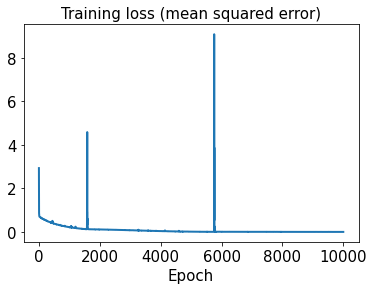

In [24]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

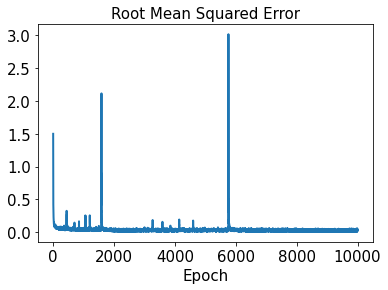

In [25]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [26]:
test_results1 = sd1.evaluate(x_test1)

1/1 [==============================] - 0s 160ms/step - loss: 7.0179e-04 - rmse: 0.0000e+00


In [27]:
decoded_train1 = sd1.predict(x_train1)

In [28]:
decoded_test1 = sd1.predict(x_test1)

In [29]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [30]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [31]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.446566859016025


In [32]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.36878457743076143


In [33]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.27548403111781156, 0.4678680996350315, 0.26718232898223976, 0.142115493191216, 0.2640915890415332, 0.3056688185201303, 0.17062523501449722, 0.25593836373528017, 0.24862557596889134, 0.21688946422450836, 0.2291109419302132, 0.7889450765844566, 0.2703222339607243, 0.5226437669986633, 0.195811157390693, 0.7384098496343101, 0.2748842991708507, 0.27260285684326846, 0.6847715949840129, 0.2677869723719545, 0.1876941119481245, 0.6316723291395205, 0.20407763585390193, 0.26101628691803136, 0.24211811031537417, 0.250275540393754, 0.2646485358855249, 0.2987022405772201, 0.28084480119716787, 0.41382874159301913, 0.08242785729539477, 0.27366478573713254, 0.17082472179925678]


In [34]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.2628534467331768, 0.09167265428752285, 0.35847132972237067, 0.2637628421303492, 0.5779665717370521, 0.14292513009490915, 0.29130336781911403, 0.15576442139232818]


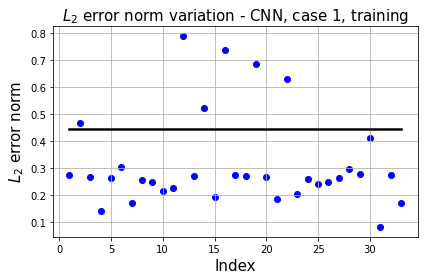

In [55]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

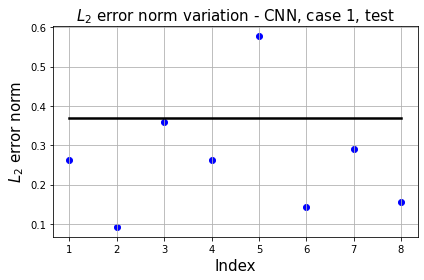

In [56]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

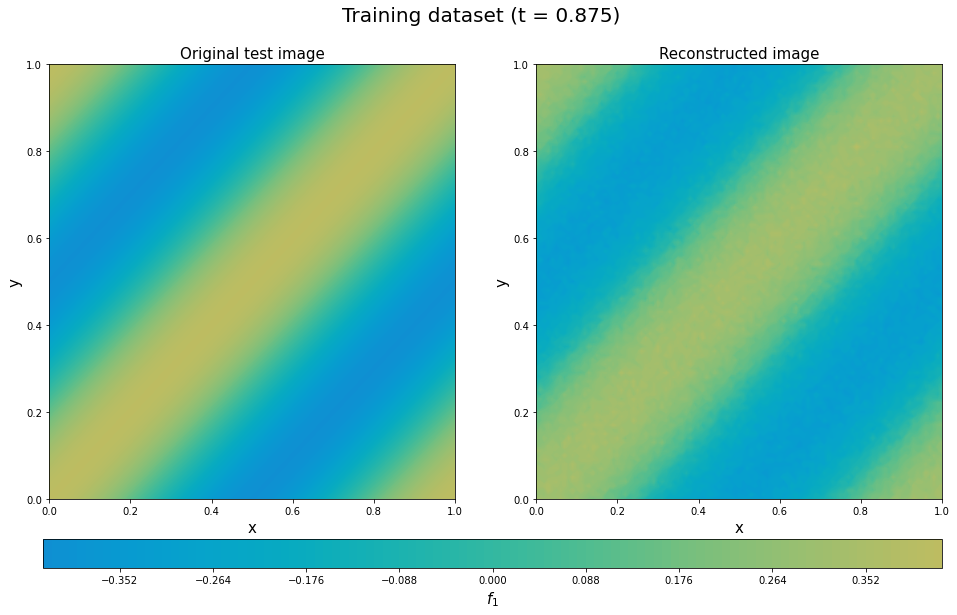

In [116]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1,1)
a2.set_clim(-1,1)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

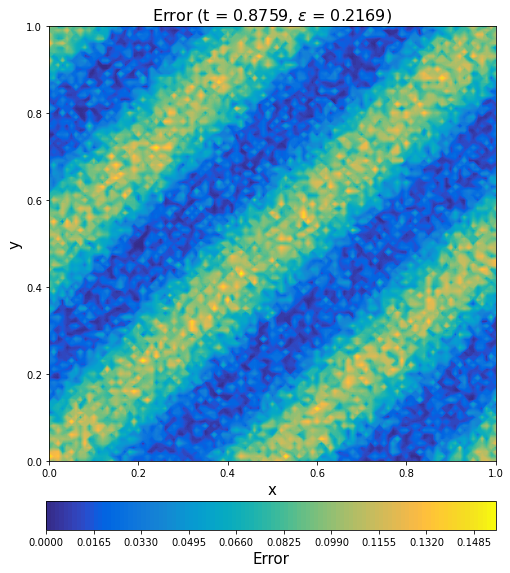

In [38]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

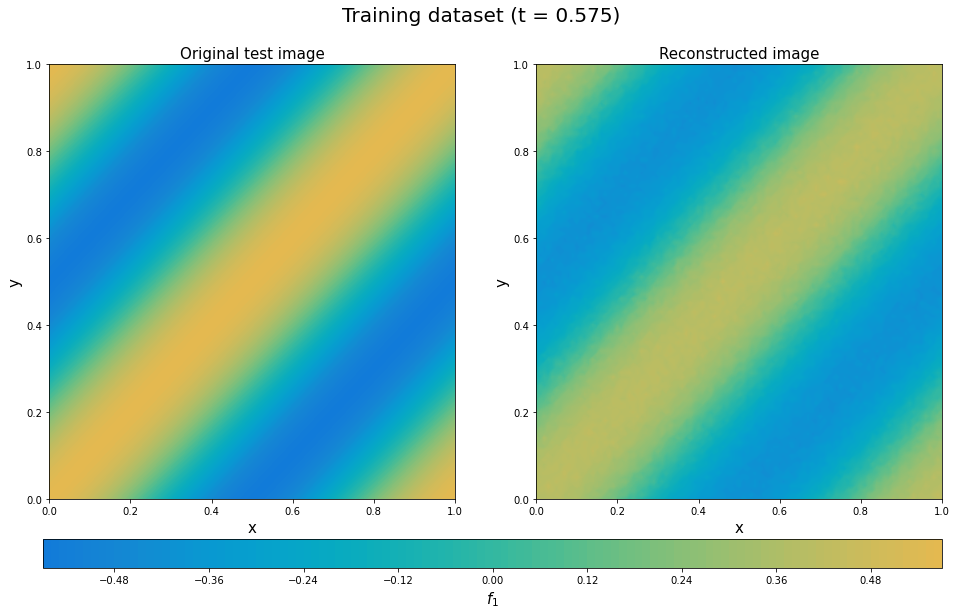

In [117]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1,1)
a2.set_clim(-1,1)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

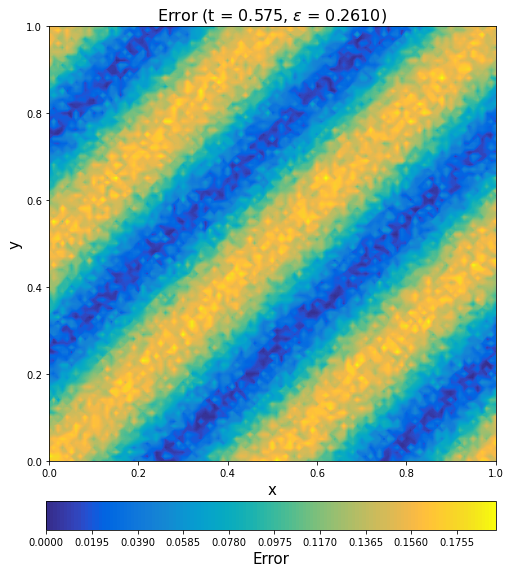

In [40]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

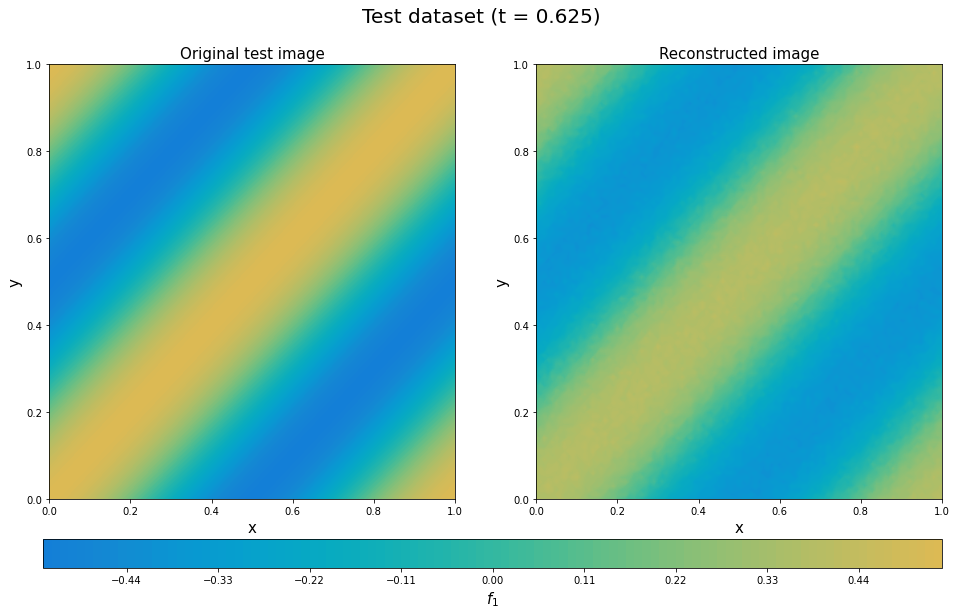

In [118]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1,1)
a2.set_clim(-1,1)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

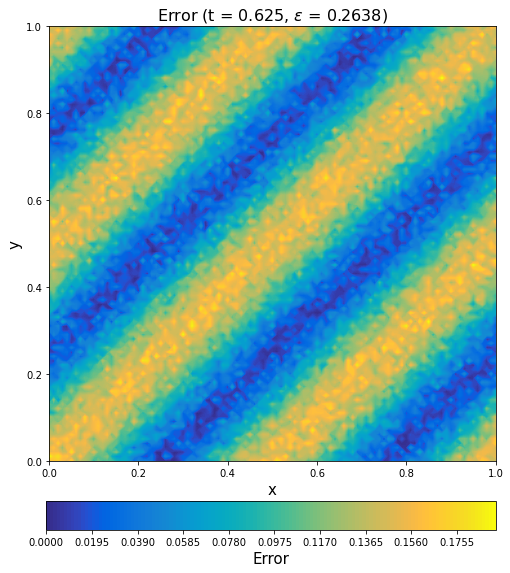

In [42]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

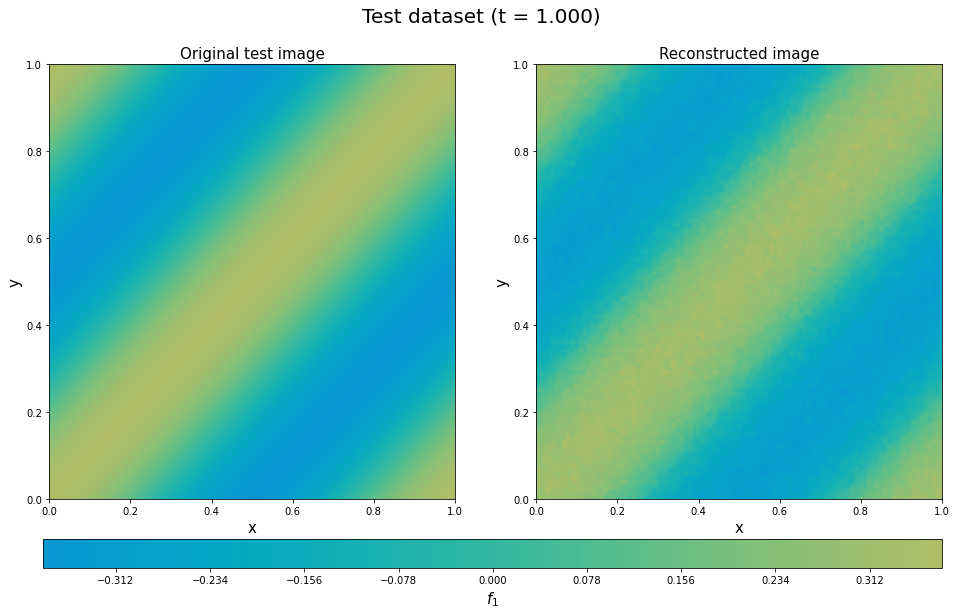

In [119]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1,1)
a2.set_clim(-1,1)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

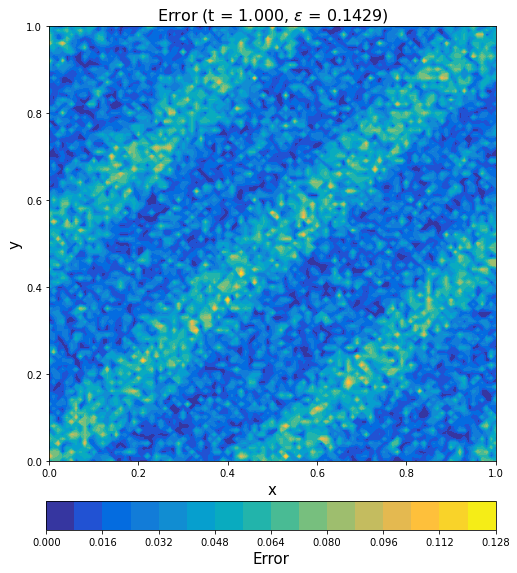

In [45]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [46]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [47]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [48]:
sensor2 = sensor2.reshape((41, 16, 1))

In [49]:
sensor2.shape

(41, 16, 1)

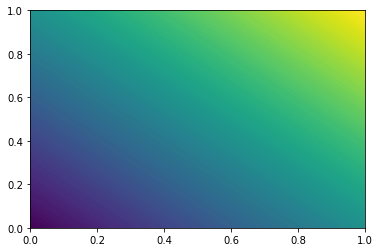

In [50]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [51]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sensor2, out2, test_size=0.18, random_state=42)

In [52]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [53]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [57]:
np.savetxt('x_AF2cnn.csv', sensor2.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF2cnn.csv', out2.reshape((41*101, 101)), delimiter=",")

In [58]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [59]:
start2 = datetime.datetime.now()
history2 = sd2.fit(x_train2, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 34ms/step - loss: 2.6778 - rmse: 1.6362
Epoch 2/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.4713 - rmse: 1.5718
Epoch 3/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.2434 - rmse: 1.4976
Epoch 4/10000
2/2 [==============================] - 0s 32ms/step - loss: 1.7075 - rmse: 1.3064
Epoch 5/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.9434 - rmse: 0.9709
Epoch 6/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.9375 - rmse: 0.9678
Epoch 7/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.4074 - rmse: 0.6377
Epoch 8/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.3078 - rmse: 0.5542
Epoch 9/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.1791 - rmse: 0.4223
Epoch 10/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.2355 - rmse: 0.4846
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 32ms/step - loss: 0.0046 - rmse: 0.0608
Epoch 169/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0143 - rmse: 0.1156
Epoch 170/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0158 - rmse: 0.1221
Epoch 171/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0073 - rmse: 0.0798
Epoch 172/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0104 - rmse: 0.0976
Epoch 173/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0068 - rmse: 0.0765
Epoch 174/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0055 - rmse: 0.0682
Epoch 175/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0175 - rmse: 0.1288
Epoch 176/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0124 - rmse: 0.1074
Epoch 177/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0024 - rmse: 0.0387
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 32ms/step - loss: 0.0036 - rmse: 0.0520
Epoch 335/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0046 - rmse: 0.0609
Epoch 336/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0077 - rmse: 0.0823
Epoch 337/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0122 - rmse: 0.1062
Epoch 338/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0191 - rmse: 0.1351
Epoch 339/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0084 - rmse: 0.0867
Epoch 340/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0016 - rmse: 0.0271
Epoch 341/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0100 - rmse: 0.0954
Epoch 342/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0193 - rmse: 0.1356
Epoch 343/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0240 - rmse: 0.1520
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 32ms/step - loss: 0.0181 - rmse: 0.1313
Epoch 501/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0181 - rmse: 0.1312
Epoch 502/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0179 - rmse: 0.1305
Epoch 503/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0130 - rmse: 0.1100
Epoch 504/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0093 - rmse: 0.0919
Epoch 505/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0072 - rmse: 0.0795
Epoch 506/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0108 - rmse: 0.0998
Epoch 507/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0040 - rmse: 0.0562
Epoch 508/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0048 - rmse: 0.0627
Epoch 509/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0082 - rmse: 0.0855
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 32ms/step - loss: 0.0056 - rmse: 0.0688
Epoch 667/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0065 - rmse: 0.0756
Epoch 668/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0079 - rmse: 0.0842
Epoch 669/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0101 - rmse: 0.0964
Epoch 670/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0162 - rmse: 0.1238
Epoch 671/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0108 - rmse: 0.1001
Epoch 672/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0034 - rmse: 0.0511
Epoch 673/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0205 - rmse: 0.1403
Epoch 674/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0309 - rmse: 0.1734
Epoch 675/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0369 - rmse: 0.1901
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 34ms/step - loss: 0.0298 - rmse: 0.1705
Epoch 833/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0182 - rmse: 0.1319
Epoch 834/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0068 - rmse: 0.0775
Epoch 835/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0148 - rmse: 0.1183
Epoch 836/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0294 - rmse: 0.1693
Epoch 837/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0249 - rmse: 0.1552
Epoch 838/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0162 - rmse: 0.1242
Epoch 839/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0101 - rmse: 0.0967
Epoch 840/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0107 - rmse: 0.0995
Epoch 841/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0105 - rmse: 0.0984
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 31ms/step - loss: 0.0197 - rmse: 0.1376
Epoch 999/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0322 - rmse: 0.1775
Epoch 1000/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0309 - rmse: 0.1737
Epoch 1001/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0283 - rmse: 0.1662
Epoch 1002/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0181 - rmse: 0.1316
Epoch 1003/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0155 - rmse: 0.1213
Epoch 1004/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0140 - rmse: 0.1152
Epoch 1005/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0117 - rmse: 0.1045
Epoch 1006/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0087 - rmse: 0.0891
Epoch 1007/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0083 - rmse: 0.0868
Epoch 1008/10000
2/2 [======

2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0422
Epoch 1163/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0540
Epoch 1164/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0067 - rmse: 0.0776
Epoch 1165/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0107 - rmse: 0.1000
Epoch 1166/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0078 - rmse: 0.0840
Epoch 1167/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0115 - rmse: 0.1042
Epoch 1168/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0040 - rmse: 0.0576
Epoch 1169/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0093 - rmse: 0.0929
Epoch 1170/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0049 - rmse: 0.0651
Epoch 1171/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0046 - rmse: 0.0626
Epoch 1172/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0752
Epoch 1327/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0044 - rmse: 0.0609
Epoch 1328/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0373
Epoch 1329/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0399
Epoch 1330/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0796
Epoch 1331/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0566
Epoch 1332/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0654
Epoch 1333/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0131 - rmse: 0.1117
Epoch 1334/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0177 - rmse: 0.1307
Epoch 1335/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0086 - rmse: 0.0893
Epoch 1336/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0079 - rmse: 0.0851
Epoch 1491/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0082 - rmse: 0.0873
Epoch 1492/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0134 - rmse: 0.1128
Epoch 1493/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0237 - rmse: 0.1518
Epoch 1494/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0319 - rmse: 0.1770
Epoch 1495/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0206 - rmse: 0.1413
Epoch 1496/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0112 - rmse: 0.1029
Epoch 1497/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0092 - rmse: 0.0928
Epoch 1498/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0158 - rmse: 0.1231
Epoch 1499/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0140 - rmse: 0.1158
Epoch 1500/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0057 - rmse: 0.0716
Epoch 1655/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0754
Epoch 1656/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0043 - rmse: 0.0606
Epoch 1657/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0649
Epoch 1658/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0081 - rmse: 0.0870
Epoch 1659/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0140 - rmse: 0.1156
Epoch 1660/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0171 - rmse: 0.1286
Epoch 1661/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0179 - rmse: 0.1317
Epoch 1662/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0098 - rmse: 0.0960
Epoch 1663/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0052 - rmse: 0.0679
Epoch 1664/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0287 - rmse: 0.1679
Epoch 1819/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0331 - rmse: 0.1806
Epoch 1820/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0206 - rmse: 0.1417
Epoch 1821/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0707
Epoch 1822/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0047 - rmse: 0.0642
Epoch 1823/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0139 - rmse: 0.1156
Epoch 1824/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0184 - rmse: 0.1336
Epoch 1825/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0160 - rmse: 0.1245
Epoch 1826/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - rmse: 0.0920
Epoch 1827/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0068 - rmse: 0.0792
Epoch 1828/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0789
Epoch 1983/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0934
Epoch 1984/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0043 - rmse: 0.0617
Epoch 1985/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0592
Epoch 1986/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0086 - rmse: 0.0901
Epoch 1987/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0153 - rmse: 0.1216
Epoch 1988/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0114 - rmse: 0.1041
Epoch 1989/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0116 - rmse: 0.1052
Epoch 1990/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0078 - rmse: 0.0854
Epoch 1991/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0111 - rmse: 0.1028
Epoch 1992/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - rmse: 0.0790
Epoch 2147/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0052 - rmse: 0.0682
Epoch 2148/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - rmse: 0.0921
Epoch 2149/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0432
Epoch 2150/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0029 - rmse: 0.0489
Epoch 2151/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0052 - rmse: 0.0685
Epoch 2152/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0062 - rmse: 0.0755
Epoch 2153/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - rmse: 0.0928
Epoch 2154/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - rmse: 0.0926
Epoch 2155/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0175 - rmse: 0.1302
Epoch 2156/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0041 - rmse: 0.0606
Epoch 2311/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0094 - rmse: 0.0945
Epoch 2312/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0088 - rmse: 0.0913
Epoch 2313/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0730
Epoch 2314/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0790
Epoch 2315/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0083 - rmse: 0.0887
Epoch 2316/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0069 - rmse: 0.0799
Epoch 2317/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0027 - rmse: 0.0471
Epoch 2318/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0079 - rmse: 0.0861
Epoch 2319/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.1774e-04 - rmse: 0.0186
Epoch 2320/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0133 - rmse: 0.1135
Epoch 2475/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0172 - rmse: 0.1294
Epoch 2476/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0215 - rmse: 0.1452
Epoch 2477/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0257 - rmse: 0.1590
Epoch 2478/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0238 - rmse: 0.1529
Epoch 2479/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0162 - rmse: 0.1256
Epoch 2480/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - rmse: 0.1009
Epoch 2481/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0040 - rmse: 0.0598
Epoch 2482/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0082 - rmse: 0.0881
Epoch 2483/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0612
Epoch 2484/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0711
Epoch 2639/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0031 - rmse: 0.0519
Epoch 2640/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0044 - rmse: 0.0633
Epoch 2641/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0482
Epoch 2642/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0337
Epoch 2643/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0015 - rmse: 0.0334
Epoch 2644/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0040 - rmse: 0.0595
Epoch 2645/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0089 - rmse: 0.0922
Epoch 2646/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0799
Epoch 2647/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0114 - rmse: 0.1045
Epoch 2648/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0127 - rmse: 0.1107
Epoch 2803/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0120 - rmse: 0.1077
Epoch 2804/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0112 - rmse: 0.1041
Epoch 2805/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0157 - rmse: 0.1237
Epoch 2806/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0084 - rmse: 0.0897
Epoch 2807/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 2808/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0328
Epoch 2809/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0098 - rmse: 0.0970
Epoch 2810/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0956
Epoch 2811/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0125 - rmse: 0.1100
Epoch 2812/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0085 - rmse: 0.0895
Epoch 2967/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0499
Epoch 2968/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0118 - rmse: 0.1062
Epoch 2969/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0616
Epoch 2970/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0089 - rmse: 0.0919
Epoch 2971/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0143 - rmse: 0.1175
Epoch 2972/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0119 - rmse: 0.1070
Epoch 2973/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0951
Epoch 2974/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0761
Epoch 2975/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0463
Epoch 2976/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0257 - rmse: 0.1589
Epoch 3131/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0330 - rmse: 0.1804
Epoch 3132/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0200 - rmse: 0.1399
Epoch 3133/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0141 - rmse: 0.1168
Epoch 3134/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0060 - rmse: 0.0743
Epoch 3135/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0129 - rmse: 0.1115
Epoch 3136/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0262 - rmse: 0.1606
Epoch 3137/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0371 - rmse: 0.1914
Epoch 3138/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0452 - rmse: 0.2116
Epoch 3139/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0498 - rmse: 0.2223
Epoch 3140/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0192 - rmse: 0.1372
Epoch 3295/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0109 - rmse: 0.1023
Epoch 3296/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0109 - rmse: 0.1022
Epoch 3297/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0115 - rmse: 0.1052
Epoch 3298/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0951
Epoch 3299/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0154 - rmse: 0.1222
Epoch 3300/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0258 - rmse: 0.1593
Epoch 3301/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0130 - rmse: 0.1122
Epoch 3302/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0937
Epoch 3303/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0074 - rmse: 0.0832
Epoch 3304/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0035 - rmse: 0.0560
Epoch 3459/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0435
Epoch 3460/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0061 - rmse: 0.0752
Epoch 3461/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0758
Epoch 3462/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0686
Epoch 3463/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0451
Epoch 3464/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0765
Epoch 3465/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 3466/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0092 - rmse: 0.0936
Epoch 3467/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0707
Epoch 3468/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0227 - rmse: 0.1494
Epoch 3623/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0237 - rmse: 0.1528
Epoch 3624/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0123 - rmse: 0.1091
Epoch 3625/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0156 - rmse: 0.1235
Epoch 3626/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0130 - rmse: 0.1122
Epoch 3627/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0038 - rmse: 0.0588
Epoch 3628/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0059 - rmse: 0.0743
Epoch 3629/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0432
Epoch 3630/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0807
Epoch 3631/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0100 - rmse: 0.0983
Epoch 3632/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0139 - rmse: 0.1163
Epoch 3787/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0063 - rmse: 0.0773
Epoch 3788/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0695
Epoch 3789/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0065 - rmse: 0.0786
Epoch 3790/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0523
Epoch 3791/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0056 - rmse: 0.0727
Epoch 3792/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0147 - rmse: 0.1197
Epoch 3793/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0066 - rmse: 0.0791
Epoch 3794/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0095 - rmse: 0.0954
Epoch 3795/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0074 - rmse: 0.0840
Epoch 3796/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0051 - rmse: 0.0683
Epoch 3951/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0562
Epoch 3952/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0383
Epoch 3953/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0017 - rmse: 0.0362
Epoch 3954/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0521
Epoch 3955/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0531
Epoch 3956/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0075 - rmse: 0.0841
Epoch 3957/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0057 - rmse: 0.0730
Epoch 3958/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0074 - rmse: 0.0836
Epoch 3959/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - rmse: 0.0929
Epoch 3960/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0158 - rmse: 0.1242
Epoch 4115/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0134 - rmse: 0.1143
Epoch 4116/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0802
Epoch 4117/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0569
Epoch 4118/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0426
Epoch 4119/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0093 - rmse: 0.0944
Epoch 4120/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0813
Epoch 4121/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0056 - rmse: 0.0723
Epoch 4122/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0112 - rmse: 0.1042
Epoch 4123/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0112 - rmse: 0.1039
Epoch 4124/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0095 - rmse: 0.0957
Epoch 4279/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0121 - rmse: 0.1083
Epoch 4280/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0150 - rmse: 0.1209
Epoch 4281/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0148 - rmse: 0.1203
Epoch 4282/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0153 - rmse: 0.1223
Epoch 4283/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0113 - rmse: 0.1047
Epoch 4284/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0081 - rmse: 0.0880
Epoch 4285/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0082 - rmse: 0.0886
Epoch 4286/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0050 - rmse: 0.0682
Epoch 4287/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0036 - rmse: 0.0571
Epoch 4288/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 4443/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0080 - rmse: 0.0873
Epoch 4444/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0028 - rmse: 0.0491
Epoch 4445/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0384
Epoch 4446/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0080 - rmse: 0.0873
Epoch 4447/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0764
Epoch 4448/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0096 - rmse: 0.0962
Epoch 4449/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0131 - rmse: 0.1128
Epoch 4450/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0159 - rmse: 0.1248
Epoch 4451/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0136 - rmse: 0.1152
Epoch 4452/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0722
Epoch 4607/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0080 - rmse: 0.0873
Epoch 4608/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0132 - rmse: 0.1136
Epoch 4609/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0168 - rmse: 0.1284
Epoch 4610/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0116 - rmse: 0.1060
Epoch 4611/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0061 - rmse: 0.0761
Epoch 4612/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 4613/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0044 - rmse: 0.0635
Epoch 4614/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0446
Epoch 4615/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0749
Epoch 4616/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0181 - rmse: 0.1332
Epoch 4771/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0072 - rmse: 0.0826
Epoch 4772/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0404
Epoch 4773/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0794
Epoch 4774/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0210 - rmse: 0.1436
Epoch 4775/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0375 - rmse: 0.1927
Epoch 4776/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0455 - rmse: 0.2124
Epoch 4777/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0351 - rmse: 0.1864
Epoch 4778/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0308 - rmse: 0.1744
Epoch 4779/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0366 - rmse: 0.1904
Epoch 4780/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0375
Epoch 4935/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0095 - rmse: 0.0955
Epoch 4936/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 4937/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0065 - rmse: 0.0785
Epoch 4938/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 4939/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0062 - rmse: 0.0765
Epoch 4940/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0735
Epoch 4941/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0815
Epoch 4942/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.9880e-04 - rmse: 0.0234
Epoch 4943/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0362
Epoch 4944/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0067 - rmse: 0.0800
Epoch 5099/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0068 - rmse: 0.0804
Epoch 5100/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0544
Epoch 5101/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0084 - rmse: 0.0898
Epoch 5102/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0554
Epoch 5103/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 5104/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0039 - rmse: 0.0596
Epoch 5105/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 5106/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0698
Epoch 5107/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0074 - rmse: 0.0842
Epoch 5108/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0132 - rmse: 0.1136
Epoch 5263/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0195 - rmse: 0.1384
Epoch 5264/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0177 - rmse: 0.1318
Epoch 5265/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0163 - rmse: 0.1264
Epoch 5266/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0130 - rmse: 0.1128
Epoch 5267/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0066 - rmse: 0.0795
Epoch 5268/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0556
Epoch 5269/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0917
Epoch 5270/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0054 - rmse: 0.0716
Epoch 5271/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0138 - rmse: 0.1160
Epoch 5272/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 5427/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.6645e-04 - rmse: 0.0254
Epoch 5428/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0606
Epoch 5429/10000
2/2 [==============================] - 0s 30ms/step - loss: 8.5665e-04 - rmse: 0.0232
Epoch 5430/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0053 - rmse: 0.0707
Epoch 5431/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0034 - rmse: 0.0558
Epoch 5432/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0645
Epoch 5433/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0023 - rmse: 0.0443
Epoch 5434/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.5914e-04 - rmse: 0.0233
Epoch 5435/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 5436/1000

2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 5591/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 5592/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0072 - rmse: 0.0832
Epoch 5593/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0572
Epoch 5594/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 5595/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0627
Epoch 5596/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0101 - rmse: 0.0988
Epoch 5597/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0041 - rmse: 0.0620
Epoch 5598/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0107 - rmse: 0.1019
Epoch 5599/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0751
Epoch 5600/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0279 - rmse: 0.1660
Epoch 5755/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0354 - rmse: 0.1873
Epoch 5756/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0410 - rmse: 0.2017
Epoch 5757/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0351 - rmse: 0.1866
Epoch 5758/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0225 - rmse: 0.1490
Epoch 5759/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0134 - rmse: 0.1145
Epoch 5760/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0709
Epoch 5761/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0034 - rmse: 0.0555
Epoch 5762/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0096 - rmse: 0.0962
Epoch 5763/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0097 - rmse: 0.0972
Epoch 5764/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0022 - rmse: 0.0429
Epoch 5919/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 5920/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0670
Epoch 5921/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0491
Epoch 5922/10000
2/2 [==============================] - 0s 30ms/step - loss: 7.4784e-04 - rmse: 0.0208
Epoch 5923/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0016 - rmse: 0.0361
Epoch 5924/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.0083e-04 - rmse: 0.0137
Epoch 5925/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 5926/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0665
Epoch 5927/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 5928/10000
2/

2/2 [==============================] - 0s 29ms/step - loss: 0.0234 - rmse: 0.1521
Epoch 6083/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0198 - rmse: 0.1398
Epoch 6084/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0088 - rmse: 0.0921
Epoch 6085/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0645
Epoch 6086/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - rmse: 0.1016
Epoch 6087/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0157 - rmse: 0.1241
Epoch 6088/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0279 - rmse: 0.1660
Epoch 6089/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0160 - rmse: 0.1251
Epoch 6090/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0156 - rmse: 0.1236
Epoch 6091/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0104 - rmse: 0.1007
Epoch 6092/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0517
Epoch 6247/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0116 - rmse: 0.1063
Epoch 6248/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0708
Epoch 6249/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0837
Epoch 6250/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0186 - rmse: 0.1354
Epoch 6251/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0239 - rmse: 0.1535
Epoch 6252/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0298 - rmse: 0.1717
Epoch 6253/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0179 - rmse: 0.1327
Epoch 6254/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0199 - rmse: 0.1401
Epoch 6255/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0169 - rmse: 0.1290
Epoch 6256/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0066 - rmse: 0.0794
Epoch 6411/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0104 - rmse: 0.1005
Epoch 6412/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0860
Epoch 6413/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0960
Epoch 6414/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 6415/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0035 - rmse: 0.0565
Epoch 6416/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0547
Epoch 6417/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0075 - rmse: 0.0849
Epoch 6418/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0142 - rmse: 0.1180
Epoch 6419/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0178 - rmse: 0.1324
Epoch 6420/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - rmse: 0.0936
Epoch 6575/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 6576/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0702
Epoch 6577/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0846
Epoch 6578/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0124 - rmse: 0.1097
Epoch 6579/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 6580/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0365
Epoch 6581/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0044 - rmse: 0.0635
Epoch 6582/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0035 - rmse: 0.0562
Epoch 6583/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0486
Epoch 6584/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0052 - rmse: 0.0700
Epoch 6739/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0581
Epoch 6740/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0666
Epoch 6741/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 6742/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0501
Epoch 6743/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0078 - rmse: 0.0865
Epoch 6744/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0445
Epoch 6745/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0076 - rmse: 0.0853
Epoch 6746/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 6747/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0807
Epoch 6748/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0345
Epoch 6903/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0584
Epoch 6904/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0718
Epoch 6905/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0053 - rmse: 0.0703
Epoch 6906/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0062 - rmse: 0.0766
Epoch 6907/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0767
Epoch 6908/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0083 - rmse: 0.0891
Epoch 6909/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0862
Epoch 6910/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0621
Epoch 6911/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0916
Epoch 6912/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 7067/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 7068/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0023 - rmse: 0.0448
Epoch 7069/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0015 - rmse: 0.0350
Epoch 7070/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 7071/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0074 - rmse: 0.0843
Epoch 7072/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0025 - rmse: 0.0464
Epoch 7073/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0054 - rmse: 0.0714
Epoch 7074/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0050 - rmse: 0.0686
Epoch 7075/10000
2/2 [==============================] - 0s 31ms/step - loss: 8.7433e-04 - rmse: 0.0238
Epoch 7076/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0287 - rmse: 0.1685
Epoch 7231/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0211 - rmse: 0.1441
Epoch 7232/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0080 - rmse: 0.0877
Epoch 7233/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0064 - rmse: 0.0784
Epoch 7234/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0123 - rmse: 0.1095
Epoch 7235/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0246 - rmse: 0.1559
Epoch 7236/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0273 - rmse: 0.1643
Epoch 7237/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0343 - rmse: 0.1844
Epoch 7238/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0379 - rmse: 0.1938
Epoch 7239/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0224 - rmse: 0.1486
Epoch 7240/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0170 - rmse: 0.1293
Epoch 7395/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0094 - rmse: 0.0954
Epoch 7396/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0076 - rmse: 0.0852
Epoch 7397/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0471
Epoch 7398/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0142 - rmse: 0.1177
Epoch 7399/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0215 - rmse: 0.1455
Epoch 7400/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0161 - rmse: 0.1255
Epoch 7401/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0113 - rmse: 0.1048
Epoch 7402/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0666
Epoch 7403/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 7404/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 7559/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0536
Epoch 7560/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0086 - rmse: 0.0914
Epoch 7561/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 7562/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0915
Epoch 7563/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0030 - rmse: 0.0519
Epoch 7564/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0943
Epoch 7565/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0121 - rmse: 0.1088
Epoch 7566/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0147 - rmse: 0.1202
Epoch 7567/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0098 - rmse: 0.0973
Epoch 7568/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 7723/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 7724/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0100 - rmse: 0.0986
Epoch 7725/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0088 - rmse: 0.0923
Epoch 7726/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - rmse: 0.0656
Epoch 7727/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0024 - rmse: 0.0456
Epoch 7728/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0593
Epoch 7729/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 7730/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0071 - rmse: 0.0825
Epoch 7731/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0719
Epoch 7732/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0164 - rmse: 0.1264
Epoch 7887/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0098 - rmse: 0.0972
Epoch 7888/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0952
Epoch 7889/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0074 - rmse: 0.0835
Epoch 7890/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - rmse: 0.1008
Epoch 7891/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0713
Epoch 7892/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0158 - rmse: 0.1243
Epoch 7893/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0168 - rmse: 0.1281
Epoch 7894/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0185 - rmse: 0.1346
Epoch 7895/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0207 - rmse: 0.1425
Epoch 7896/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - rmse: 0.0646
Epoch 8051/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0463
Epoch 8052/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0056 - rmse: 0.0728
Epoch 8053/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0048 - rmse: 0.0673
Epoch 8054/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0757
Epoch 8055/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0015 - rmse: 0.0339
Epoch 8056/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0602
Epoch 8057/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0769
Epoch 8058/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0575
Epoch 8059/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0810
Epoch 8060/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0728
Epoch 8215/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0164 - rmse: 0.1269
Epoch 8216/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0102 - rmse: 0.0993
Epoch 8217/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 8218/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0695
Epoch 8219/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0074 - rmse: 0.0841
Epoch 8220/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0152 - rmse: 0.1222
Epoch 8221/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0169 - rmse: 0.1287
Epoch 8222/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0151 - rmse: 0.1218
Epoch 8223/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0165 - rmse: 0.1273
Epoch 8224/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0058 - rmse: 0.0741
Epoch 8379/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0556
Epoch 8380/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 8381/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 8382/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0050 - rmse: 0.0684
Epoch 8383/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0084 - rmse: 0.0898
Epoch 8384/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0085 - rmse: 0.0903
Epoch 8385/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0021 - rmse: 0.0419
Epoch 8386/10000
2/2 [==============================] - 0s 33ms/step - loss: 8.3430e-04 - rmse: 0.0228
Epoch 8387/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 8388/10000
2/2 [=

2/2 [==============================] - 0s 35ms/step - loss: 0.0226 - rmse: 0.1491
Epoch 8543/10000
2/2 [==============================] - 0s 42ms/step - loss: 0.0126 - rmse: 0.1106
Epoch 8544/10000
2/2 [==============================] - 0s 40ms/step - loss: 0.0073 - rmse: 0.0833
Epoch 8545/10000
2/2 [==============================] - 0s 40ms/step - loss: 0.0082 - rmse: 0.0883
Epoch 8546/10000
2/2 [==============================] - 0s 40ms/step - loss: 0.0084 - rmse: 0.0896
Epoch 8547/10000
2/2 [==============================] - 0s 40ms/step - loss: 0.0221 - rmse: 0.1474
Epoch 8548/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0240 - rmse: 0.1539
Epoch 8549/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0128 - rmse: 0.1113
Epoch 8550/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0072 - rmse: 0.0824
Epoch 8551/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0483
Epoch 8552/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 8707/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 8708/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0595
Epoch 8709/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0850
Epoch 8710/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - rmse: 0.1016
Epoch 8711/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0048 - rmse: 0.0671
Epoch 8712/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0041 - rmse: 0.0617
Epoch 8713/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.9035e-04 - rmse: 0.0242
Epoch 8714/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0041 - rmse: 0.0612
Epoch 8715/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0862
Epoch 8716/10000
2/2 [=

2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - rmse: 0.0802
Epoch 8871/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0947
Epoch 8872/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0135 - rmse: 0.1149
Epoch 8873/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0086 - rmse: 0.0912
Epoch 8874/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0074 - rmse: 0.0844
Epoch 8875/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0088 - rmse: 0.0923
Epoch 8876/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0447
Epoch 8877/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0078 - rmse: 0.0867
Epoch 8878/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 8879/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0029 - rmse: 0.0515
Epoch 8880/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 9035/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 9036/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 9037/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0033 - rmse: 0.0554
Epoch 9038/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0085 - rmse: 0.0909
Epoch 9039/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0049 - rmse: 0.0681
Epoch 9040/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - rmse: 0.0939
Epoch 9041/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0076 - rmse: 0.0857
Epoch 9042/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 9043/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0820
Epoch 9044/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0105 - rmse: 0.1011
Epoch 9199/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0100 - rmse: 0.0987
Epoch 9200/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0756
Epoch 9201/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0756
Epoch 9202/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0032 - rmse: 0.0540
Epoch 9203/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 9204/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0720
Epoch 9205/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0064 - rmse: 0.0784
Epoch 9206/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0805
Epoch 9207/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.7212e-04 - rmse: 0.0169
Epoch 9208/10000
2/2 [=

2/2 [==============================] - 0s 31ms/step - loss: 0.0149 - rmse: 0.1210
Epoch 9363/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0208 - rmse: 0.1433
Epoch 9364/10000
2/2 [==============================] - 0s 47ms/step - loss: 0.0140 - rmse: 0.1169
Epoch 9365/10000
2/2 [==============================] - 0s 57ms/step - loss: 0.0113 - rmse: 0.1052
Epoch 9366/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0837
Epoch 9367/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0052 - rmse: 0.0704
Epoch 9368/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 9369/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0059 - rmse: 0.0749
Epoch 9370/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0096 - rmse: 0.0968
Epoch 9371/10000
2/2 [==============================] - 0s 64ms/step - loss: 0.0116 - rmse: 0.1063
Epoch 9372/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 9527/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0459
Epoch 9528/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 9529/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 9530/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 9531/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0069 - rmse: 0.0816
Epoch 9532/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0071 - rmse: 0.0828
Epoch 9533/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 9534/10000
2/2 [==============================] - 0s 30ms/step - loss: 6.0156e-04 - rmse: 0.0184
Epoch 9535/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0076 - rmse: 0.0859
Epoch 9536/10000
2/2 [=

2/2 [==============================] - 0s 31ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 9691/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 9692/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0530
Epoch 9693/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0014 - rmse: 0.0329
Epoch 9694/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0078 - rmse: 0.0865
Epoch 9695/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 9696/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0052 - rmse: 0.0704
Epoch 9697/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0069 - rmse: 0.0812
Epoch 9698/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0094 - rmse: 0.0956
Epoch 9699/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0116 - rmse: 0.1063
Epoch 9700/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0023 - rmse: 0.0447
Epoch 9855/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0014 - rmse: 0.0335
Epoch 9856/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0034 - rmse: 0.0563
Epoch 9857/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 9858/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0021 - rmse: 0.0426
Epoch 9859/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0611
Epoch 9860/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0083 - rmse: 0.0893
Epoch 9861/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0050 - rmse: 0.0686
Epoch 9862/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0638
Epoch 9863/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 9864/10000
2/2 [=====

In [60]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:15:05.998739


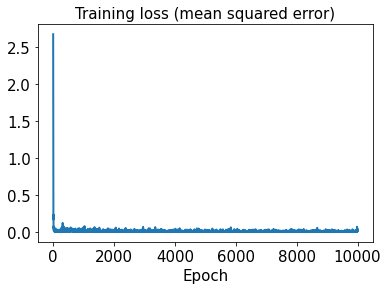

In [61]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

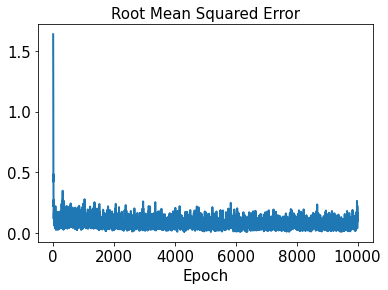

In [62]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [63]:
test_results2 = sd2.evaluate(x_test2)

1/1 [==============================] - 0s 133ms/step - loss: 3.3158e-04 - rmse: 0.0000e+00


In [64]:
decoded_train2 = sd2.predict(x_train2)

In [65]:
decoded_test2 = sd2.predict(x_test2)

In [66]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [67]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [68]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

2.1772101286067307


In [69]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

2.1108430782512704


In [70]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[2.0205190243789324, 2.621533879199571, 2.11577245812486, 2.500797173483825, 2.384695565215836, 2.562779067829543, 2.4379684651313602, 1.9148787067761803, 2.4124718831986773, 1.807420194000703, 1.8426018969627957, 2.7578190477383937, 2.084582298129365, 2.6437598562488835, 2.5213713891372405, 2.7344812834703154, 1.9871986799912507, 2.2709552459012907, 2.7110010889593292, 1.9509147315622903, 1.7395587511349042, 2.6880711092283796, 1.772984099106533, 2.2088705947682543, 1.8782645187997589, 2.542972092301656, 2.2395695972712732, 2.3557027988480295, 2.299771858389648, 2.6008957520353517, 2.460538265090145, 2.0524446901485365, 1.7067130567551043]


In [71]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[2.177973034428663, 2.4807387072873217, 2.582236043931773, 2.146374291429524, 2.6653954572532266, 1.6476338156365202, 2.327952023420897, 1.6762765939396254]


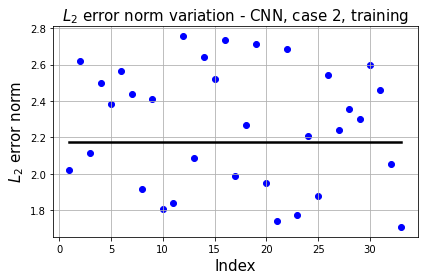

In [72]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

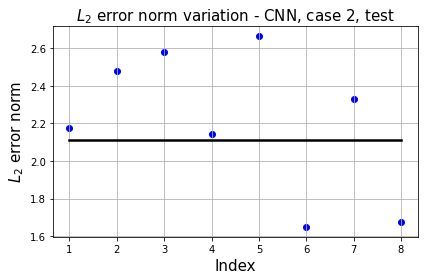

In [73]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

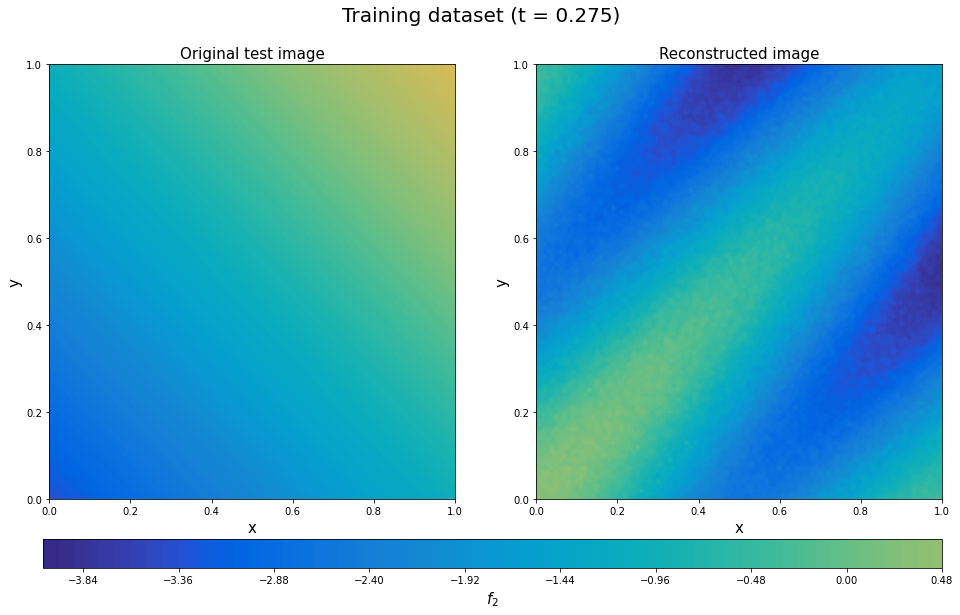

In [127]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0,3)
a2.set_clim(-4,3)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

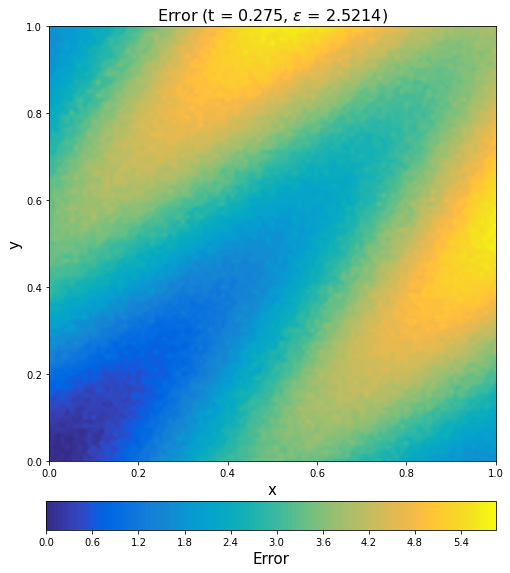

In [75]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

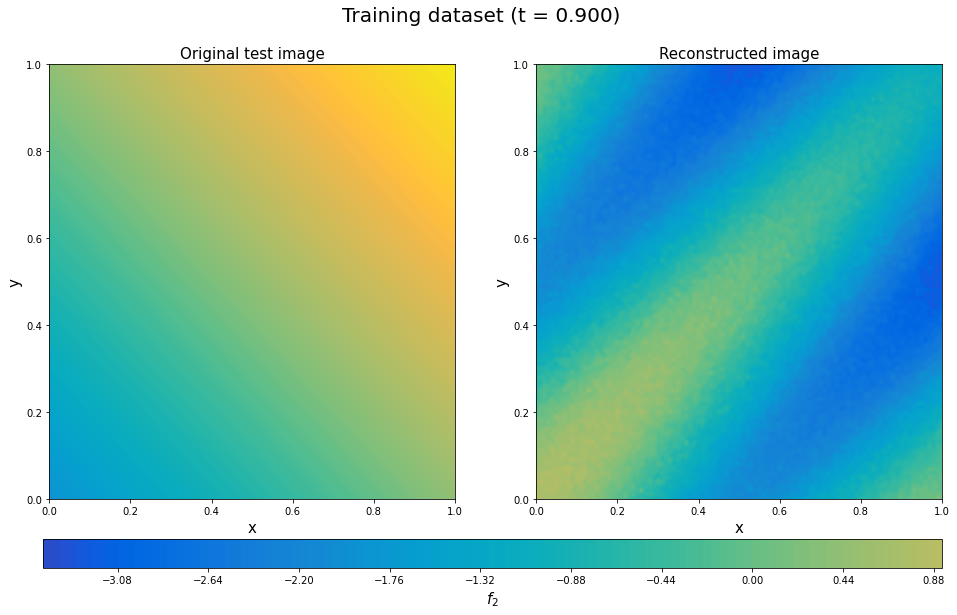

In [128]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0,3)
a2.set_clim(-4,3)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

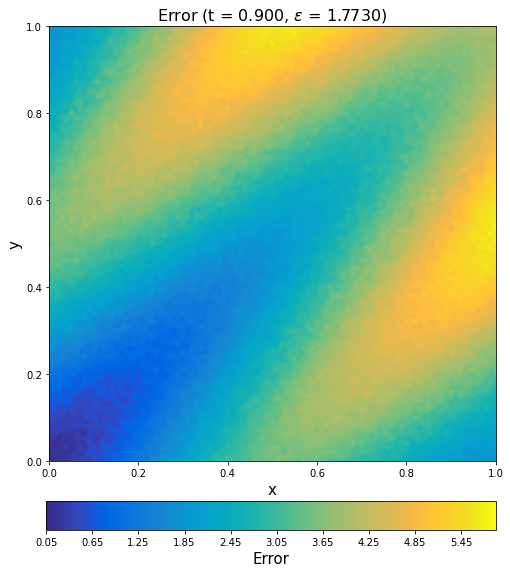

In [77]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

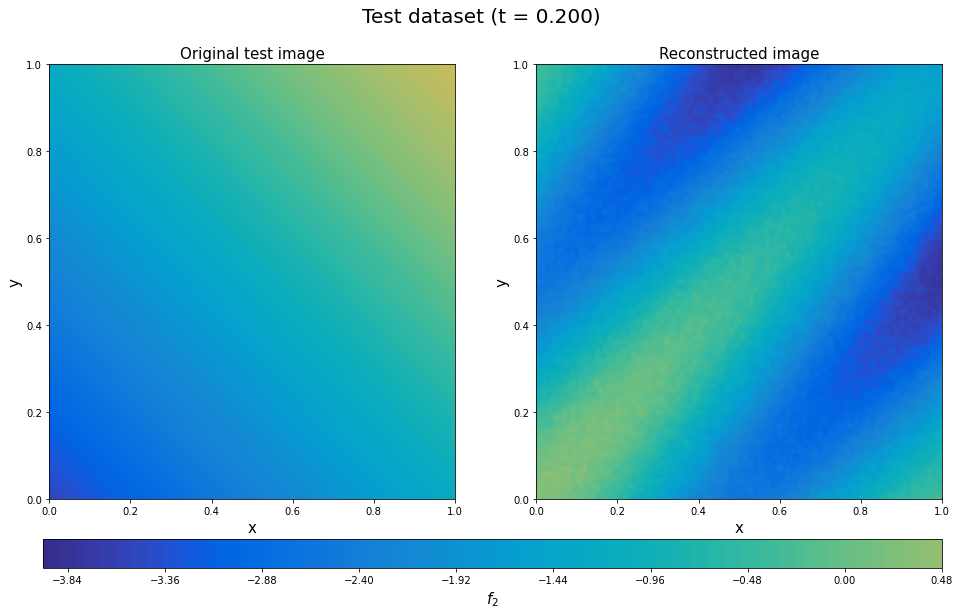

In [129]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0,3)
a2.set_clim(-4,3)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

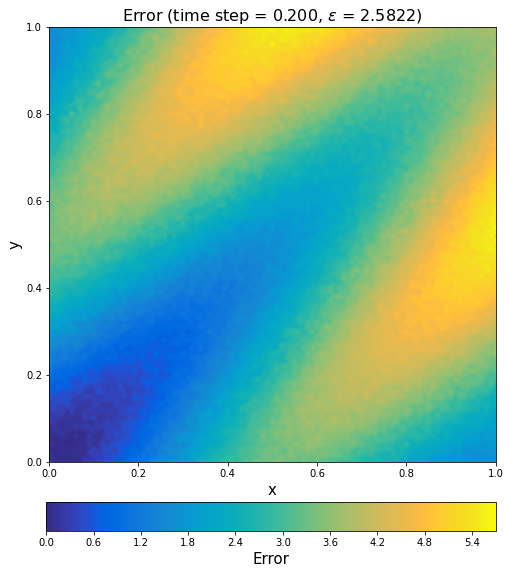

In [79]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

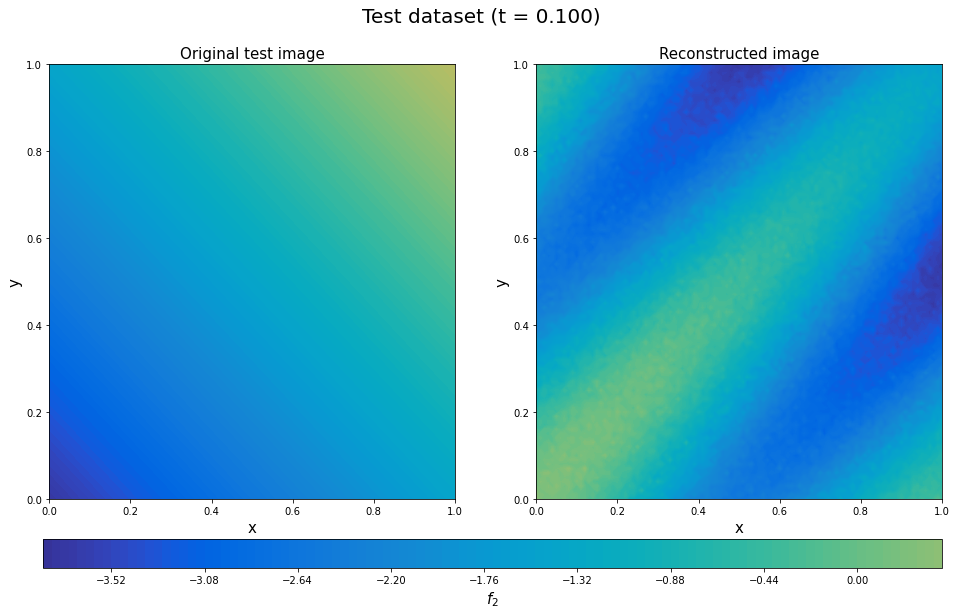

In [132]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0,3)
a2.set_clim(-4,3)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

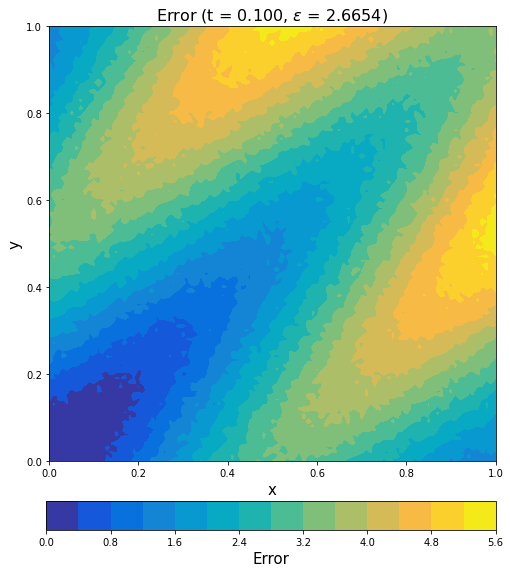

In [81]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [82]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [83]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [84]:
sensor3 = sensor3.reshape((41, 16, 1))

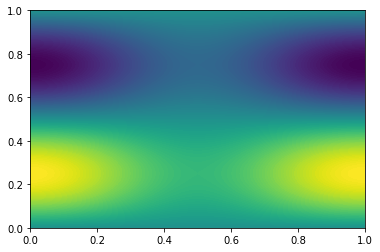

In [85]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [86]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sensor3, out3, test_size=0.18, random_state=42)

In [87]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [88]:
np.savetxt('x_AF3cnn.csv', sensor3.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF3cnn.csv', out3.reshape((41*101, 101)), delimiter=",")

In [89]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [90]:
start3 = datetime.datetime.now()
history3 = sd3.fit(x_train3, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 32ms/step - loss: 3.2787 - rmse: 1.8106
Epoch 2/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.9036 - rmse: 1.7039
Epoch 3/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5412 - rmse: 1.5940
Epoch 4/10000
2/2 [==============================] - 0s 30ms/step - loss: 2.1996 - rmse: 1.4830
Epoch 5/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.8803 - rmse: 1.3711
Epoch 6/10000
2/2 [==============================] - 0s 29ms/step - loss: 1.5864 - rmse: 1.2594
Epoch 7/10000
2/2 [==============================] - 0s 36ms/step - loss: 1.3134 - rmse: 1.1459
Epoch 8/10000
2/2 [==============================] - 0s 31ms/step - loss: 1.0765 - rmse: 1.0374
Epoch 9/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.9010 - rmse: 0.9490
Epoch 10/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.7906 - rmse: 0.8889
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 55ms/step - loss: 0.0079 - rmse: 0.0859
Epoch 169/10000
2/2 [==============================] - 0s 59ms/step - loss: 0.0171 - rmse: 0.1290
Epoch 170/10000
2/2 [==============================] - 0s 42ms/step - loss: 0.0108 - rmse: 0.1017
Epoch 171/10000
2/2 [==============================] - 0s 70ms/step - loss: 0.0070 - rmse: 0.0804
Epoch 172/10000
2/2 [==============================] - 0s 42ms/step - loss: 0.0035 - rmse: 0.0545
Epoch 173/10000
2/2 [==============================] - 0s 49ms/step - loss: 0.0113 - rmse: 0.1038
Epoch 174/10000
2/2 [==============================] - 0s 55ms/step - loss: 0.0048 - rmse: 0.0654
Epoch 175/10000
2/2 [==============================] - 0s 66ms/step - loss: 0.0049 - rmse: 0.0666
Epoch 176/10000
2/2 [==============================] - 0s 67ms/step - loss: 0.0059 - rmse: 0.0738
Epoch 177/10000
2/2 [==============================] - 0s 36ms/step - loss: 0.0080 - rmse: 0.0869
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 30ms/step - loss: 0.0089 - rmse: 0.0916
Epoch 335/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0063 - rmse: 0.0762
Epoch 336/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0358
Epoch 337/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0466
Epoch 338/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0439
Epoch 339/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0015 - rmse: 0.0329
Epoch 340/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0691
Epoch 341/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0059 - rmse: 0.0739
Epoch 342/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0056 - rmse: 0.0713
Epoch 343/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0073 - rmse: 0.0827
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0708
Epoch 501/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0434
Epoch 502/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0531
Epoch 503/10000
2/2 [==============================] - 0s 37ms/step - loss: 0.0035 - rmse: 0.0554
Epoch 504/10000
2/2 [==============================] - 0s 41ms/step - loss: 0.0094 - rmse: 0.0949
Epoch 505/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0070 - rmse: 0.0811
Epoch 506/10000
2/2 [==============================] - 0s 36ms/step - loss: 0.0071 - rmse: 0.0816
Epoch 507/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0040 - rmse: 0.0599
Epoch 508/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0053 - rmse: 0.0696
Epoch 509/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0103 - rmse: 0.0993
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 31ms/step - loss: 0.0101 - rmse: 0.0985
Epoch 667/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0146 - rmse: 0.1189
Epoch 668/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0194 - rmse: 0.1376
Epoch 669/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0193 - rmse: 0.1374
Epoch 670/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0098 - rmse: 0.0968
Epoch 671/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0108 - rmse: 0.1018
Epoch 672/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0175 - rmse: 0.1308
Epoch 673/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0184 - rmse: 0.1340
Epoch 674/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0132 - rmse: 0.1131
Epoch 675/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0172 - rmse: 0.1294
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - rmse: 0.0311
Epoch 833/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0048 - rmse: 0.0664
Epoch 834/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0090 - rmse: 0.0925
Epoch 835/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0077 - rmse: 0.0853
Epoch 836/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0049 - rmse: 0.0670
Epoch 837/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0037 - rmse: 0.0577
Epoch 838/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0032 - rmse: 0.0529
Epoch 839/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - rmse: 0.0495
Epoch 840/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0056 - rmse: 0.0719
Epoch 841/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0049 - rmse: 0.0671
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 28ms/step - loss: 0.0156 - rmse: 0.1233
Epoch 999/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0301 - rmse: 0.1723
Epoch 1000/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0633 - rmse: 0.2509
Epoch 1001/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0807 - rmse: 0.2834
Epoch 1002/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0471 - rmse: 0.2160
Epoch 1003/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0169 - rmse: 0.1283
Epoch 1004/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0236 - rmse: 0.1523
Epoch 1005/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0276 - rmse: 0.1649
Epoch 1006/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0308 - rmse: 0.1743
Epoch 1007/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0298 - rmse: 0.1713
Epoch 1008/10000
2/2 [======

2/2 [==============================] - 0s 32ms/step - loss: 0.0056 - rmse: 0.0725
Epoch 1163/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0064 - rmse: 0.0776
Epoch 1164/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - rmse: 0.0476
Epoch 1165/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0028 - rmse: 0.0487
Epoch 1166/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0028 - rmse: 0.0494
Epoch 1167/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0043 - rmse: 0.0626
Epoch 1168/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0028 - rmse: 0.0487
Epoch 1169/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0075 - rmse: 0.0841
Epoch 1170/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0054 - rmse: 0.0709
Epoch 1171/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0019 - rmse: 0.0394
Epoch 1172/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0045 - rmse: 0.0645
Epoch 1327/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0019 - rmse: 0.0384
Epoch 1328/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0036 - rmse: 0.0564
Epoch 1329/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0088 - rmse: 0.0918
Epoch 1330/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0133 - rmse: 0.1137
Epoch 1331/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0192 - rmse: 0.1373
Epoch 1332/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0271 - rmse: 0.1633
Epoch 1333/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0245 - rmse: 0.1552
Epoch 1334/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0125 - rmse: 0.1102
Epoch 1335/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0104 - rmse: 0.0999
Epoch 1336/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0744
Epoch 1491/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0018 - rmse: 0.0375
Epoch 1492/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0390
Epoch 1493/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0097 - rmse: 0.0966
Epoch 1494/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0259
Epoch 1495/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0628
Epoch 1496/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0403
Epoch 1497/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0110 - rmse: 0.1029
Epoch 1498/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0087 - rmse: 0.0913
Epoch 1499/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0170 - rmse: 0.1289
Epoch 1500/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0096 - rmse: 0.0961
Epoch 1655/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0553
Epoch 1656/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0076 - rmse: 0.0853
Epoch 1657/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0627
Epoch 1658/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0061 - rmse: 0.0758
Epoch 1659/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0690
Epoch 1660/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0034 - rmse: 0.0551
Epoch 1661/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0488
Epoch 1662/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0035 - rmse: 0.0558
Epoch 1663/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0098 - rmse: 0.0971
Epoch 1664/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0061 - rmse: 0.0755
Epoch 1819/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0176 - rmse: 0.1313
Epoch 1820/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0217 - rmse: 0.1461
Epoch 1821/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0191 - rmse: 0.1368
Epoch 1822/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0144 - rmse: 0.1184
Epoch 1823/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0844
Epoch 1824/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0083 - rmse: 0.0890
Epoch 1825/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0104 - rmse: 0.1004
Epoch 1826/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0132 - rmse: 0.1134
Epoch 1827/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0131 - rmse: 0.1129
Epoch 1828/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0188 - rmse: 0.1357
Epoch 1983/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0097 - rmse: 0.0968
Epoch 1984/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - rmse: 0.0647
Epoch 1985/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0456
Epoch 1986/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0041 - rmse: 0.0612
Epoch 1987/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0061 - rmse: 0.0758
Epoch 1988/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0640
Epoch 1989/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0760
Epoch 1990/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0099 - rmse: 0.0974
Epoch 1991/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0147 - rmse: 0.1199
Epoch 1992/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 7.0819e-04 - rmse: 0.0173
Epoch 2147/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0034 - rmse: 0.0543
Epoch 2148/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0438
Epoch 2149/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0257
Epoch 2150/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.3875e-04 - rmse: 0.0182
Epoch 2151/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0100 - rmse: 0.0981
Epoch 2152/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.5338e-04 - rmse: 0.0187
Epoch 2153/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0054 - rmse: 0.0710
Epoch 2154/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0020 - rmse: 0.0405
Epoch 2155/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0028 - rmse: 0.0494
Epoch 2156/1000

2/2 [==============================] - 0s 29ms/step - loss: 0.0129 - rmse: 0.1118
Epoch 2311/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0073 - rmse: 0.0833
Epoch 2312/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0078 - rmse: 0.0861
Epoch 2313/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0495
Epoch 2314/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0024 - rmse: 0.0454
Epoch 2315/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0512
Epoch 2316/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0394
Epoch 2317/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0029 - rmse: 0.0505
Epoch 2318/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0629
Epoch 2319/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0107 - rmse: 0.1016
Epoch 2320/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0606
Epoch 2475/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0046 - rmse: 0.0651
Epoch 2476/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0065 - rmse: 0.0786
Epoch 2477/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0097 - rmse: 0.0966
Epoch 2478/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0142 - rmse: 0.1178
Epoch 2479/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0213 - rmse: 0.1448
Epoch 2480/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0231 - rmse: 0.1506
Epoch 2481/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0252 - rmse: 0.1577
Epoch 2482/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0292 - rmse: 0.1699
Epoch 2483/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0248 - rmse: 0.1562
Epoch 2484/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0455
Epoch 2639/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0112 - rmse: 0.1041
Epoch 2640/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0025 - rmse: 0.0462
Epoch 2641/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0304
Epoch 2642/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0309
Epoch 2643/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 2644/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 2645/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0766
Epoch 2646/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0521
Epoch 2647/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0045 - rmse: 0.0640
Epoch 2648/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0711
Epoch 2803/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0570
Epoch 2804/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0044 - rmse: 0.0636
Epoch 2805/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0521
Epoch 2806/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0807
Epoch 2807/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0147 - rmse: 0.1198
Epoch 2808/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0086 - rmse: 0.0905
Epoch 2809/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0690
Epoch 2810/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0466
Epoch 2811/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0044 - rmse: 0.0633
Epoch 2812/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0142 - rmse: 0.1177
Epoch 2967/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0182 - rmse: 0.1333
Epoch 2968/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0162 - rmse: 0.1258
Epoch 2969/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0159 - rmse: 0.1247
Epoch 2970/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0170 - rmse: 0.1288
Epoch 2971/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0098 - rmse: 0.0969
Epoch 2972/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0657
Epoch 2973/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0697
Epoch 2974/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0798
Epoch 2975/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0089 - rmse: 0.0920
Epoch 2976/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0115 - rmse: 0.1054
Epoch 3131/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0754
Epoch 3132/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0728
Epoch 3133/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0694
Epoch 3134/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0011 - rmse: 0.0281
Epoch 3135/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0687
Epoch 3136/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 3137/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - rmse: 0.0932
Epoch 3138/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0087 - rmse: 0.0912
Epoch 3139/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0016 - rmse: 0.0350
Epoch 3140/10000
2/2 [=====

2/2 [==============================] - 0s 34ms/step - loss: 0.0059 - rmse: 0.0743
Epoch 3295/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 3296/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0092 - rmse: 0.0939
Epoch 3297/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - rmse: 0.0957
Epoch 3298/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0058 - rmse: 0.0736
Epoch 3299/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0045 - rmse: 0.0644
Epoch 3300/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0029 - rmse: 0.0503
Epoch 3301/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0028 - rmse: 0.0495
Epoch 3302/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0114 - rmse: 0.1050
Epoch 3303/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0035 - rmse: 0.0566
Epoch 3304/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 3459/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - rmse: 0.0365
Epoch 3460/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0051 - rmse: 0.0687
Epoch 3461/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0382
Epoch 3462/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0035 - rmse: 0.0565
Epoch 3463/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0019 - rmse: 0.0390
Epoch 3464/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0054 - rmse: 0.0710
Epoch 3465/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - rmse: 0.0366
Epoch 3466/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0015 - rmse: 0.0346
Epoch 3467/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 3468/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0171 - rmse: 0.1294
Epoch 3623/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0162 - rmse: 0.1258
Epoch 3624/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0154 - rmse: 0.1229
Epoch 3625/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0074 - rmse: 0.0838
Epoch 3626/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0096 - rmse: 0.0961
Epoch 3627/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 3628/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0054 - rmse: 0.0714
Epoch 3629/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0066 - rmse: 0.0790
Epoch 3630/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0096 - rmse: 0.0964
Epoch 3631/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0067 - rmse: 0.0795
Epoch 3632/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0139 - rmse: 0.1165
Epoch 3787/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0140 - rmse: 0.1168
Epoch 3788/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0140 - rmse: 0.1171
Epoch 3789/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0127 - rmse: 0.1112
Epoch 3790/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0096 - rmse: 0.0965
Epoch 3791/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0121 - rmse: 0.1087
Epoch 3792/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0038 - rmse: 0.0587
Epoch 3793/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0106 - rmse: 0.1012
Epoch 3794/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0032 - rmse: 0.0532
Epoch 3795/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0071 - rmse: 0.0821
Epoch 3796/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 3951/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0057 - rmse: 0.0736
Epoch 3952/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0036 - rmse: 0.0568
Epoch 3953/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0075 - rmse: 0.0845
Epoch 3954/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0014 - rmse: 0.0326
Epoch 3955/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 3956/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0018 - rmse: 0.0379
Epoch 3957/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0034 - rmse: 0.0558
Epoch 3958/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0034 - rmse: 0.0552
Epoch 3959/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0024 - rmse: 0.0455
Epoch 3960/10000
2/2 [=====

2/2 [==============================] - 0s 31ms/step - loss: 0.0142 - rmse: 0.1180
Epoch 4115/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0185 - rmse: 0.1348
Epoch 4116/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0136 - rmse: 0.1152
Epoch 4117/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0091 - rmse: 0.0939
Epoch 4118/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0131 - rmse: 0.1132
Epoch 4119/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0119 - rmse: 0.1074
Epoch 4120/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0087 - rmse: 0.0915
Epoch 4121/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0065 - rmse: 0.0784
Epoch 4122/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0049 - rmse: 0.0677
Epoch 4123/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0075 - rmse: 0.0847
Epoch 4124/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 4279/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0061 - rmse: 0.0761
Epoch 4280/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0050 - rmse: 0.0685
Epoch 4281/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0094 - rmse: 0.0953
Epoch 4282/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0105 - rmse: 0.1011
Epoch 4283/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0102 - rmse: 0.0996
Epoch 4284/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0916
Epoch 4285/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0096 - rmse: 0.0963
Epoch 4286/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0850
Epoch 4287/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0078 - rmse: 0.0863
Epoch 4288/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0445
Epoch 4443/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0023 - rmse: 0.0441
Epoch 4444/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 4445/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0753
Epoch 4446/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0659
Epoch 4447/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0088 - rmse: 0.0921
Epoch 4448/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0012 - rmse: 0.0294
Epoch 4449/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0634
Epoch 4450/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 4451/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0102 - rmse: 0.0997
Epoch 4452/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0648
Epoch 4607/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0490
Epoch 4608/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0023 - rmse: 0.0451
Epoch 4609/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0699
Epoch 4610/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0057 - rmse: 0.0737
Epoch 4611/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0075 - rmse: 0.0846
Epoch 4612/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - rmse: 0.0653
Epoch 4613/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 4614/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0073 - rmse: 0.0835
Epoch 4615/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0028 - rmse: 0.0504
Epoch 4616/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 4771/10000
2/2 [==============================] - 0s 28ms/step - loss: 6.6006e-04 - rmse: 0.0191
Epoch 4772/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 4773/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0019 - rmse: 0.0397
Epoch 4774/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 4775/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0593
Epoch 4776/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0741
Epoch 4777/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 4778/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0041 - rmse: 0.0616
Epoch 4779/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 4780/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0142 - rmse: 0.1180
Epoch 4935/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0103 - rmse: 0.1001
Epoch 4936/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0068 - rmse: 0.0806
Epoch 4937/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0691
Epoch 4938/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0773
Epoch 4939/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0823
Epoch 4940/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0111 - rmse: 0.1038
Epoch 4941/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0102 - rmse: 0.0998
Epoch 4942/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0652
Epoch 4943/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0813
Epoch 4944/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0155 - rmse: 0.1234
Epoch 5099/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0139 - rmse: 0.1168
Epoch 5100/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0117 - rmse: 0.1066
Epoch 5101/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0110 - rmse: 0.1037
Epoch 5102/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0077 - rmse: 0.0862
Epoch 5103/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0075 - rmse: 0.0847
Epoch 5104/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0062 - rmse: 0.0766
Epoch 5105/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0860
Epoch 5106/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 5107/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0576
Epoch 5108/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0111 - rmse: 0.1039
Epoch 5263/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0129 - rmse: 0.1125
Epoch 5264/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0109 - rmse: 0.1033
Epoch 5265/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0124 - rmse: 0.1099
Epoch 5266/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0077 - rmse: 0.0863
Epoch 5267/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0054 - rmse: 0.0712
Epoch 5268/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 5269/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0584
Epoch 5270/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0425
Epoch 5271/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 5272/10000
2/2 [=====

2/2 [==============================] - 0s 32ms/step - loss: 0.0133 - rmse: 0.1142
Epoch 5427/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0050 - rmse: 0.0690
Epoch 5428/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0034 - rmse: 0.0561
Epoch 5429/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 5430/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0093 - rmse: 0.0950
Epoch 5431/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0029 - rmse: 0.0508
Epoch 5432/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 5433/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 5434/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 5435/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 5436/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0818
Epoch 5591/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 5592/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 5593/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 5594/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0813
Epoch 5595/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 5596/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 5597/10000
2/2 [==============================] - 0s 32ms/step - loss: 7.1163e-04 - rmse: 0.0213
Epoch 5598/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 5599/10000
2/2 [==============================] - 0s 36ms/step - loss: 0.0037 - rmse: 0.0583
Epoch 5600/10000
2/2 [=

2/2 [==============================] - 0s 30ms/step - loss: 0.0091 - rmse: 0.0937
Epoch 5755/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - rmse: 0.0474
Epoch 5756/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0116 - rmse: 0.1061
Epoch 5757/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0089 - rmse: 0.0925
Epoch 5758/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0193 - rmse: 0.1378
Epoch 5759/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0114 - rmse: 0.1053
Epoch 5760/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0133 - rmse: 0.1140
Epoch 5761/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0211 - rmse: 0.1441
Epoch 5762/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0151 - rmse: 0.1214
Epoch 5763/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0144 - rmse: 0.1189
Epoch 5764/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0545
Epoch 5919/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.4602e-04 - rmse: 0.0230
Epoch 5920/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0059 - rmse: 0.0746
Epoch 5921/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 5922/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.4295e-04 - rmse: 0.0231
Epoch 5923/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0040 - rmse: 0.0604
Epoch 5924/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0093 - rmse: 0.0947
Epoch 5925/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0080 - rmse: 0.0878
Epoch 5926/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0062 - rmse: 0.0767
Epoch 5927/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0108 - rmse: 0.1026
Epoch 5928/10000
2/

2/2 [==============================] - 0s 30ms/step - loss: 0.0019 - rmse: 0.0400
Epoch 6083/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.0572e-04 - rmse: 0.0254
Epoch 6084/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0040 - rmse: 0.0607
Epoch 6085/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0665
Epoch 6086/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 6087/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 6088/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0095 - rmse: 0.0963
Epoch 6089/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 6090/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0054 - rmse: 0.0718
Epoch 6091/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0064 - rmse: 0.0785
Epoch 6092/10000
2/2 [=

2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - rmse: 0.0481
Epoch 6247/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 6248/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0096 - rmse: 0.0964
Epoch 6249/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0684
Epoch 6250/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0650
Epoch 6251/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0044 - rmse: 0.0645
Epoch 6252/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 6253/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 6254/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0034 - rmse: 0.0562
Epoch 6255/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0050 - rmse: 0.0688
Epoch 6256/10000
2/2 [=====

2/2 [==============================] - 0s 28ms/step - loss: 0.0178 - rmse: 0.1326
Epoch 6411/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0103 - rmse: 0.1000
Epoch 6412/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0071 - rmse: 0.0828
Epoch 6413/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0050 - rmse: 0.0687
Epoch 6414/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0079 - rmse: 0.0874
Epoch 6415/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 6416/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 6417/10000
2/2 [==============================] - 0s 27ms/step - loss: 0.0066 - rmse: 0.0797
Epoch 6418/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0081 - rmse: 0.0885
Epoch 6419/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0045 - rmse: 0.0650
Epoch 6420/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0097 - rmse: 0.0972
Epoch 6575/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0131 - rmse: 0.1133
Epoch 6576/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0127 - rmse: 0.1118
Epoch 6577/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0067 - rmse: 0.0801
Epoch 6578/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0066 - rmse: 0.0799
Epoch 6579/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 6580/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0050 - rmse: 0.0694
Epoch 6581/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 6582/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0733
Epoch 6583/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0820
Epoch 6584/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0129 - rmse: 0.1127
Epoch 6739/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0046 - rmse: 0.0663
Epoch 6740/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0026 - rmse: 0.0491
Epoch 6741/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 6742/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 6743/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.5854e-04 - rmse: 0.0269
Epoch 6744/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.0829e-04 - rmse: 0.0218
Epoch 6745/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0049 - rmse: 0.0686
Epoch 6746/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0010 - rmse: 0.0277
Epoch 6747/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0046 - rmse: 0.0663
Epoch 6748/10000
2/

2/2 [==============================] - 0s 32ms/step - loss: 0.0057 - rmse: 0.0738
Epoch 6903/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 6904/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0732
Epoch 6905/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 6906/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0629
Epoch 6907/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0080 - rmse: 0.0879
Epoch 6908/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0124 - rmse: 0.1102
Epoch 6909/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0829
Epoch 6910/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0071 - rmse: 0.0828
Epoch 6911/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - rmse: 0.0513
Epoch 6912/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0010 - rmse: 0.0287
Epoch 7067/10000
2/2 [==============================] - 0s 28ms/step - loss: 8.4725e-04 - rmse: 0.0250
Epoch 7068/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0093 - rmse: 0.0953
Epoch 7069/10000
2/2 [==============================] - 0s 29ms/step - loss: 9.1515e-04 - rmse: 0.0263
Epoch 7070/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0027 - rmse: 0.0502
Epoch 7071/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0039 - rmse: 0.0605
Epoch 7072/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0062 - rmse: 0.0772
Epoch 7073/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0130 - rmse: 0.1131
Epoch 7074/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0451
Epoch 7075/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 7076/10000
2/

2/2 [==============================] - 0s 42ms/step - loss: 0.0058 - rmse: 0.0750
Epoch 7231/10000
2/2 [==============================] - 0s 79ms/step - loss: 0.0062 - rmse: 0.0772
Epoch 7232/10000
2/2 [==============================] - 0s 58ms/step - loss: 0.0106 - rmse: 0.1019
Epoch 7233/10000
2/2 [==============================] - 0s 77ms/step - loss: 0.0036 - rmse: 0.0585
Epoch 7234/10000
2/2 [==============================] - 0s 75ms/step - loss: 0.0014 - rmse: 0.0348
Epoch 7235/10000
2/2 [==============================] - 0s 40ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 7236/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 7237/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 7238/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 7239/10000
2/2 [==============================] - 0s 35ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 7240/10000
2/2 [=====

2/2 [==============================] - 0s 62ms/step - loss: 0.0100 - rmse: 0.0991
Epoch 7395/10000
2/2 [==============================] - 0s 58ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 7396/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 7397/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0077 - rmse: 0.0868
Epoch 7398/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0055 - rmse: 0.0727
Epoch 7399/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - rmse: 0.0337
Epoch 7400/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0100 - rmse: 0.0988
Epoch 7401/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0033 - rmse: 0.0553
Epoch 7402/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 7403/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0065 - rmse: 0.0793
Epoch 7404/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 7559/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.9759e-04 - rmse: 0.0199
Epoch 7560/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 7561/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 7562/10000
2/2 [==============================] - 0s 37ms/step - loss: 7.6035e-04 - rmse: 0.0237
Epoch 7563/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 7564/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 7565/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0017 - rmse: 0.0386
Epoch 7566/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0059 - rmse: 0.0752
Epoch 7567/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0058 - rmse: 0.0746
Epoch 7568/10000
2/

2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 7723/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0098 - rmse: 0.0978
Epoch 7724/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 7725/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 7726/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 7727/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 7728/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.0921e-04 - rmse: 0.0248
Epoch 7729/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0014 - rmse: 0.0344
Epoch 7730/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0673
Epoch 7731/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0605
Epoch 7732/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 7887/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 7888/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0564
Epoch 7889/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 7890/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 7891/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0535
Epoch 7892/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0014 - rmse: 0.0348
Epoch 7893/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0463
Epoch 7894/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0061 - rmse: 0.0767
Epoch 7895/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 7896/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0637
Epoch 8051/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0076 - rmse: 0.0859
Epoch 8052/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0092 - rmse: 0.0949
Epoch 8053/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0071 - rmse: 0.0830
Epoch 8054/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0060 - rmse: 0.0763
Epoch 8055/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 8056/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0030 - rmse: 0.0527
Epoch 8057/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0020 - rmse: 0.0423
Epoch 8058/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 8059/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 8060/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 8215/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0113 - rmse: 0.1054
Epoch 8216/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 8217/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0033 - rmse: 0.0555
Epoch 8218/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0013 - rmse: 0.0330
Epoch 8219/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 8220/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0049 - rmse: 0.0686
Epoch 8221/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.0015e-04 - rmse: 0.0225
Epoch 8222/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0047 - rmse: 0.0668
Epoch 8223/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 8224/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0129 - rmse: 0.1126
Epoch 8379/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0051 - rmse: 0.0703
Epoch 8380/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0817
Epoch 8381/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0079 - rmse: 0.0877
Epoch 8382/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0069 - rmse: 0.0818
Epoch 8383/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0028 - rmse: 0.0513
Epoch 8384/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0027 - rmse: 0.0499
Epoch 8385/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 8386/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0050 - rmse: 0.0695
Epoch 8387/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 8388/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0923
Epoch 8543/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0159 - rmse: 0.1253
Epoch 8544/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0223 - rmse: 0.1487
Epoch 8545/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0197 - rmse: 0.1396
Epoch 8546/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0189 - rmse: 0.1367
Epoch 8547/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0189 - rmse: 0.1368
Epoch 8548/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0117 - rmse: 0.1072
Epoch 8549/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0087 - rmse: 0.0920
Epoch 8550/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0122 - rmse: 0.1094
Epoch 8551/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 8552/10000
2/2 [=====

2/2 [==============================] - 0s 30ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 8707/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0707
Epoch 8708/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0030 - rmse: 0.0533
Epoch 8709/10000
2/2 [==============================] - 0s 29ms/step - loss: 7.9424e-04 - rmse: 0.0245
Epoch 8710/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0023 - rmse: 0.0459
Epoch 8711/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0090 - rmse: 0.0939
Epoch 8712/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 8713/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0050 - rmse: 0.0692
Epoch 8714/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0039 - rmse: 0.0610
Epoch 8715/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0657
Epoch 8716/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 8871/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0056 - rmse: 0.0736
Epoch 8872/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0026 - rmse: 0.0493
Epoch 8873/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0036 - rmse: 0.0584
Epoch 8874/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0052 - rmse: 0.0705
Epoch 8875/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0078 - rmse: 0.0871
Epoch 8876/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0064 - rmse: 0.0790
Epoch 8877/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 8878/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0048 - rmse: 0.0681
Epoch 8879/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0029 - rmse: 0.0525
Epoch 8880/10000
2/2 [=====

2/2 [==============================] - 0s 29ms/step - loss: 9.5846e-04 - rmse: 0.0278
Epoch 9035/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 9036/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0048 - rmse: 0.0678
Epoch 9037/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0063 - rmse: 0.0782
Epoch 9038/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.1499e-04 - rmse: 0.0252
Epoch 9039/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0096 - rmse: 0.0969
Epoch 9040/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0070 - rmse: 0.0824
Epoch 9041/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0585
Epoch 9042/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0089 - rmse: 0.0935
Epoch 9043/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0084 - rmse: 0.0904
Epoch 9044/10000
2/

2/2 [==============================] - 0s 30ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 9199/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0028 - rmse: 0.0510
Epoch 9200/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 9201/10000
2/2 [==============================] - 0s 30ms/step - loss: 8.9659e-04 - rmse: 0.0269
Epoch 9202/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 9203/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 9204/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0084 - rmse: 0.0909
Epoch 9205/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0085 - rmse: 0.0911
Epoch 9206/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 9207/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 9208/10000
2/2 [=

2/2 [==============================] - 0s 29ms/step - loss: 0.0034 - rmse: 0.0564
Epoch 9363/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 9364/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 9365/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.4788e-04 - rmse: 0.0260
Epoch 9366/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 9367/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.2684e-04 - rmse: 0.0188
Epoch 9368/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.6196e-04 - rmse: 0.0197
Epoch 9369/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 9370/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0070 - rmse: 0.0825
Epoch 9371/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 9372/1000

2/2 [==============================] - 0s 30ms/step - loss: 0.0085 - rmse: 0.0911
Epoch 9527/10000
2/2 [==============================] - 0s 29ms/step - loss: 4.6203e-04 - rmse: 0.0163
Epoch 9528/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 9529/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0380
Epoch 9530/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 9531/10000
2/2 [==============================] - 0s 31ms/step - loss: 5.5871e-04 - rmse: 0.0191
Epoch 9532/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 9533/10000
2/2 [==============================] - 0s 33ms/step - loss: 0.0033 - rmse: 0.0556
Epoch 9534/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0038 - rmse: 0.0600
Epoch 9535/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0036 - rmse: 0.0583
Epoch 9536/10000
2/

2/2 [==============================] - 0s 29ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 9691/10000
2/2 [==============================] - 0s 29ms/step - loss: 8.2583e-04 - rmse: 0.0256
Epoch 9692/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0016 - rmse: 0.0375
Epoch 9693/10000
2/2 [==============================] - 0s 30ms/step - loss: 5.5132e-04 - rmse: 0.0195
Epoch 9694/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 9695/10000
2/2 [==============================] - 0s 31ms/step - loss: 0.0049 - rmse: 0.0687
Epoch 9696/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 9697/10000
2/2 [==============================] - 0s 28ms/step - loss: 0.0026 - rmse: 0.0489
Epoch 9698/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 9699/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 9700/10000
2/

2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - rmse: 0.0550
Epoch 9855/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0103 - rmse: 0.1008
Epoch 9856/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 9857/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0038 - rmse: 0.0603
Epoch 9858/10000
2/2 [==============================] - 0s 30ms/step - loss: 0.0089 - rmse: 0.0937
Epoch 9859/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 9860/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0023 - rmse: 0.0467
Epoch 9861/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0038 - rmse: 0.0599
Epoch 9862/10000
2/2 [==============================] - 0s 29ms/step - loss: 5.8691e-04 - rmse: 0.0206
Epoch 9863/10000
2/2 [==============================] - 0s 29ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 9864/10000
2/2 [=

In [91]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:15:11.040424


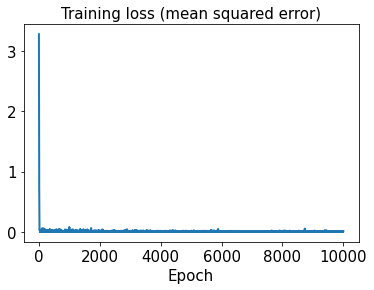

In [92]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

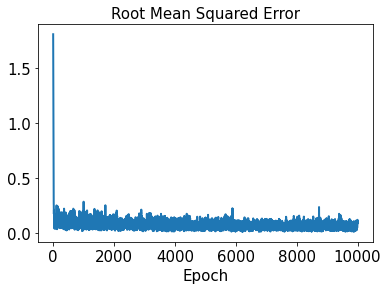

In [93]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [94]:
test_results3 = sd3.evaluate(x_test3)

1/1 [==============================] - 0s 131ms/step - loss: 1.7037e-04 - rmse: 0.0000e+00


In [95]:
decoded_train3 = sd3.predict(x_train3)

In [96]:
decoded_test3 = sd3.predict(x_test3)

In [97]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [98]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [99]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

3.772782342969231


In [100]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

3.9190397116285496


In [101]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[4.847541437523259, 3.1534270659219037, 4.611005322397873, 3.589755291797276, 3.9050475408854415, 3.377677693937424, 3.729756531568023, 5.123220776699158, 3.813216476011051, 5.449590362760861, 5.334766716769686, 2.707106967761615, 4.686393302001675, 3.0775037166585584, 3.5258507731671798, 2.782641563683653, 4.934356833923652, 4.258360837884286, 2.855405305215041, 5.025836770254756, 5.698189953443532, 2.928790536891986, 5.570378212418983, 4.395270616911148, 5.226200599894315, 3.4511169081929456, 4.326705213938599, 3.997120156570822, 4.178728615585041, 3.2297791598477703, 3.670073718969234, 4.7647429720885635, 5.832244892848841]


In [102]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[4.465445042607095, 3.6384516917966576, 3.304524342061214, 4.537436455169, 3.0026184882785936, 6.118152115845022, 4.087062972674977, 5.972746817469649]


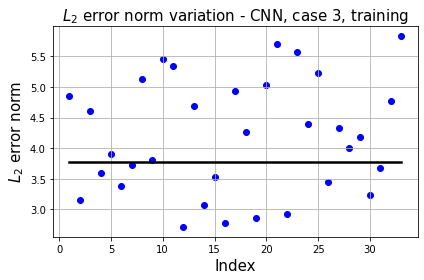

In [103]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

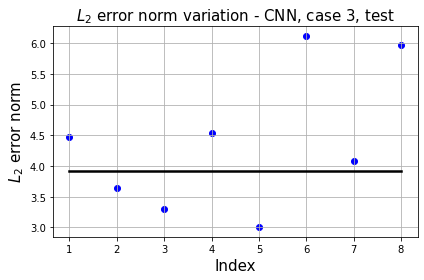

In [104]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - CNN, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

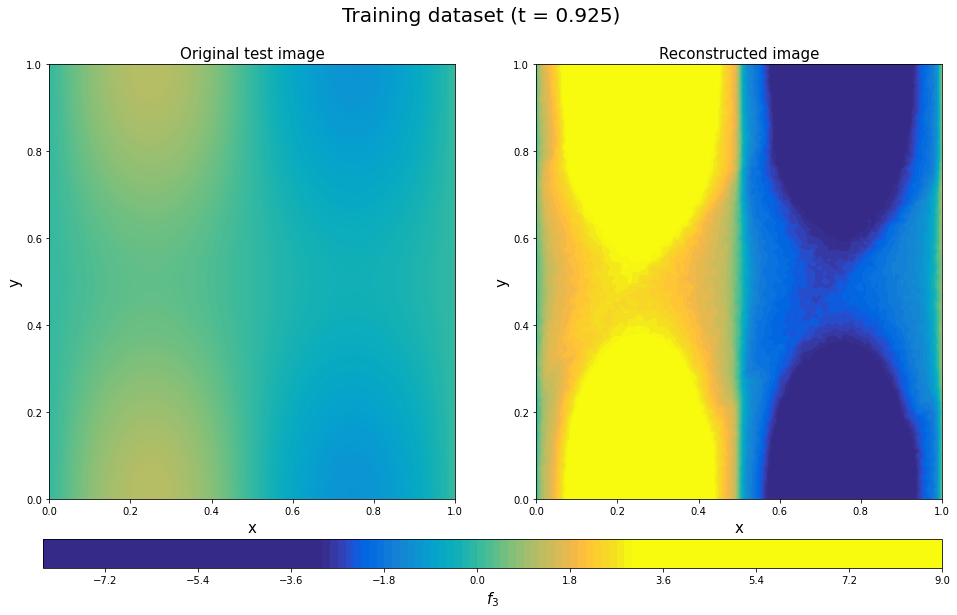

In [135]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

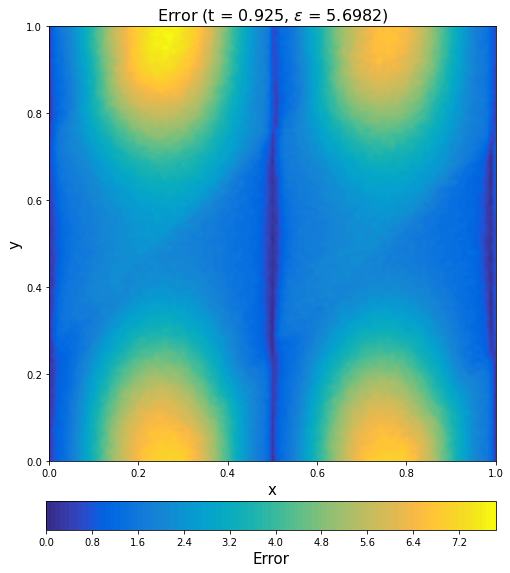

In [106]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

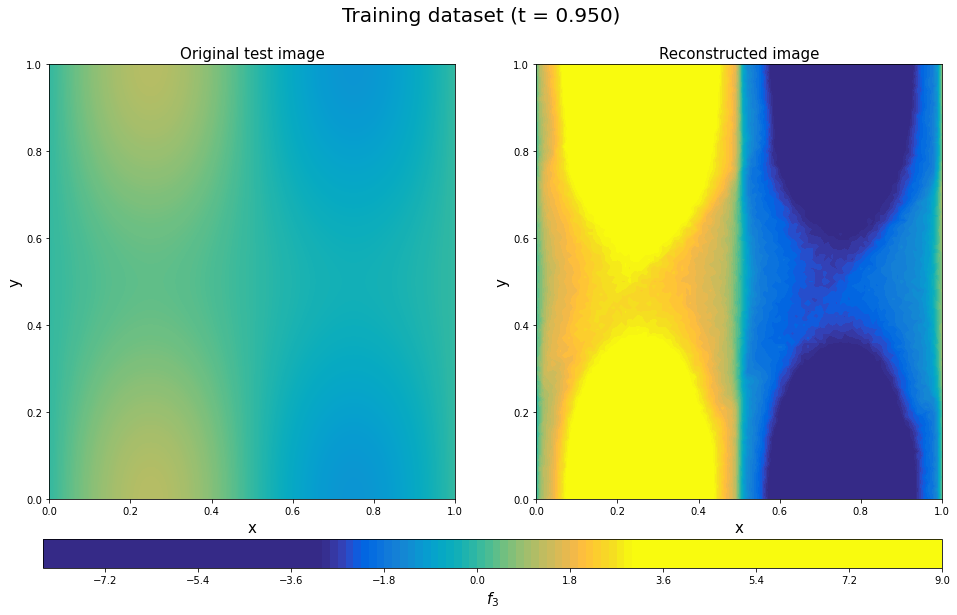

In [134]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

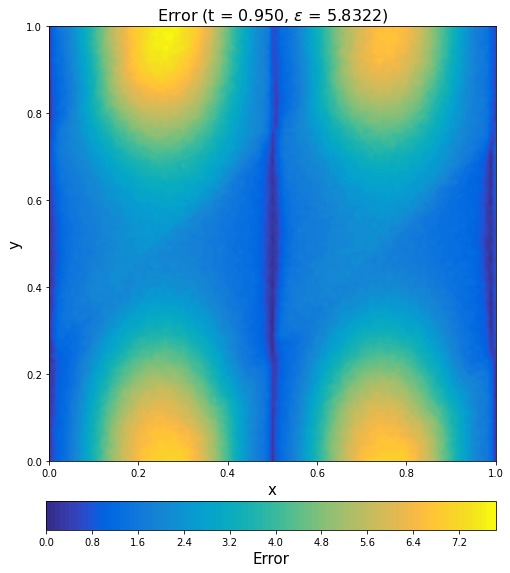

In [108]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

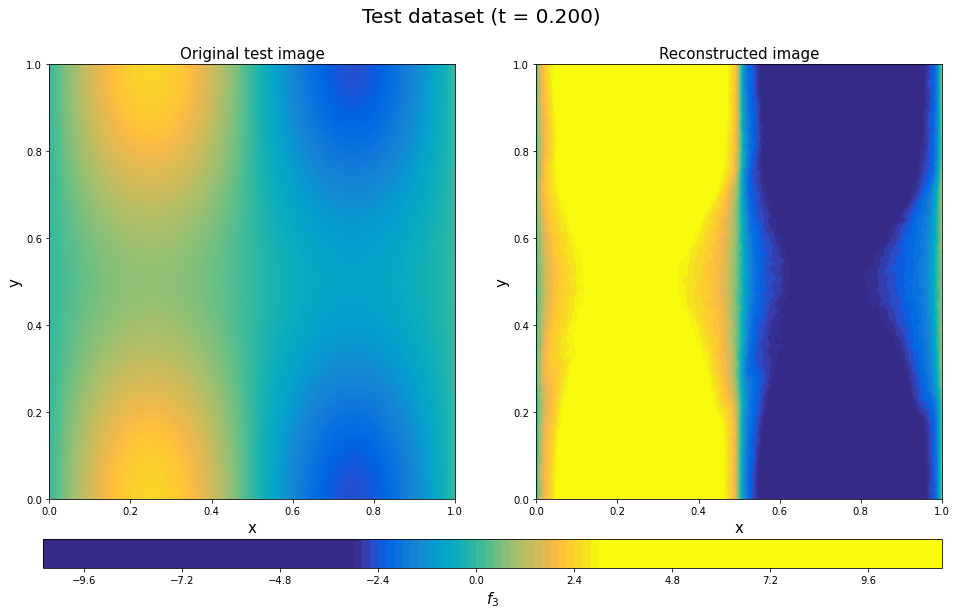

In [137]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

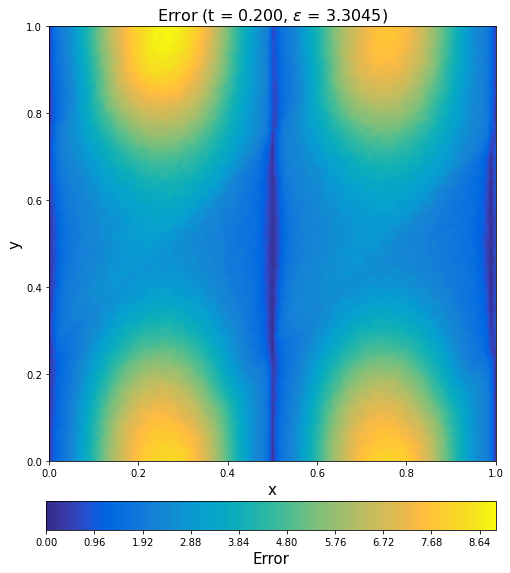

In [136]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

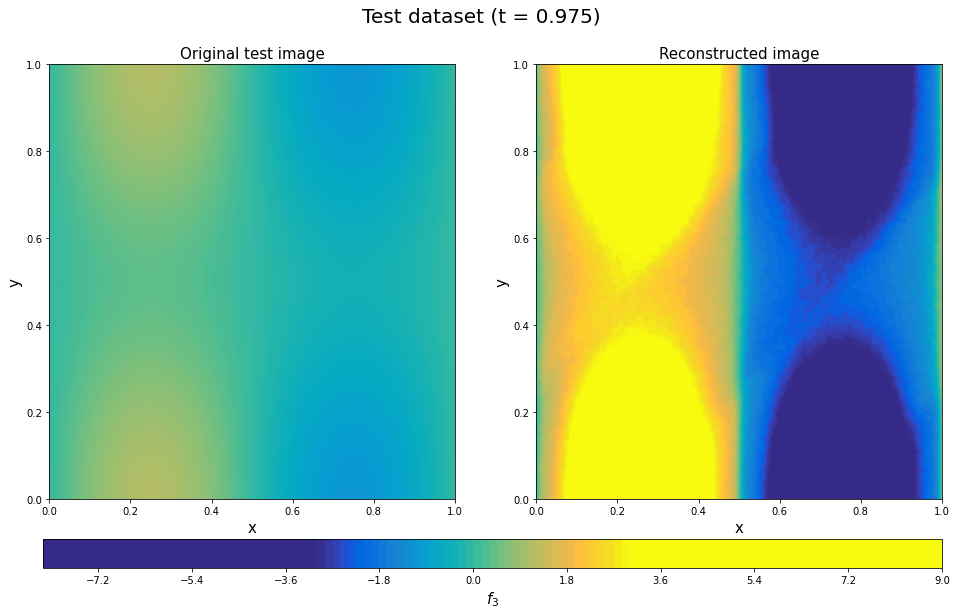

In [114]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a2, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

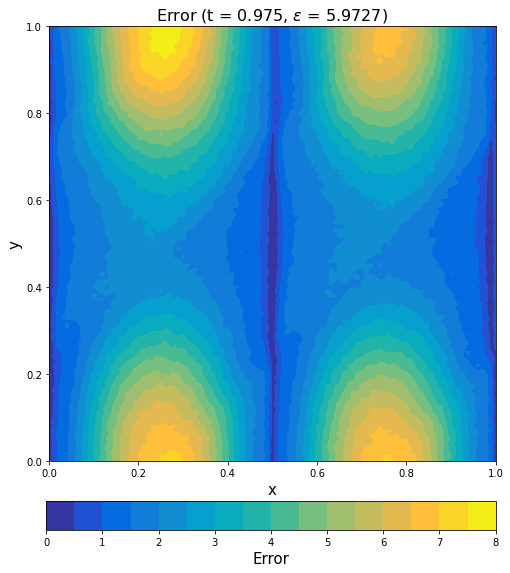

In [112]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()